In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report


from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Link to data

[IBM HR Data](https://www.kaggle.com/datasets/rushikeshghate/capstone-projectibm-employee-attrition-prediction?select=IBM+HR+Data+new.csv)

This dataset has 23436 rows and 37 columns describing different employees profiles (department, pay rate, whether they are still employedd at the company...). It contains both numeric and categorical variables. It is important to note that this is a hypothetical dataset created by IBM data scientists.

##[Link to GitHub](https://github.com/Anne-Paris/IBM_DataSet_Attrition.git)

#Graph formatting

In [48]:
SMALL_SIZE = 15
MEDIUM_SIZE = 20
BIGGER_SIZE = 25
# Set font sizes individually. For example, you may want the title
# to be very big, but the axes labels to be only medium size.
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
# plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


#Data loading / cleaning

In [49]:
df = pd.read_csv('/content/drive/MyDrive/Project 3 : Math 3439/data/IBM HR Data new.csv')
df.head()


<ipython-input-49-0ca9faaf8ffb>:1: DtypeWarning: Columns (5,8,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Project 3 : Math 3439/data/IBM HR Data new.csv')


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Employee Source
0,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,1,...,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
1,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,1,...,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
2,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,7,...,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
3,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,8,...,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
4,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,9,...,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral


In [50]:
df['Attrition'].unique()

array(['Voluntary Resignation', 'Current employee', nan], dtype=object)

In [51]:
df['EnvironmentSatisfaction'].unique()

array([2.00000e+00, 4.00000e+00, 1.00000e+00, 3.00000e+00,         nan,
       1.27249e+05, 1.29588e+05])

In [52]:
df.isna().sum()

Age                          3
Attrition                   13
BusinessTravel               8
DailyRate                   12
Department                  11
DistanceFromHome             9
Education                   12
EducationField               9
EmployeeCount                5
EmployeeNumber               1
Application ID               3
EnvironmentSatisfaction      9
Gender                      10
HourlyRate                   9
JobInvolvement               9
JobLevel                     7
JobRole                      9
JobSatisfaction              9
MaritalStatus               11
MonthlyIncome               13
MonthlyRate                 11
NumCompaniesWorked           9
Over18                      10
OverTime                    12
PercentSalaryHike           14
PerformanceRating           10
RelationshipSatisfaction     8
StandardHours               10
StockOptionLevel             9
TotalWorkingYears            8
TrainingTimesLastYear       11
WorkLifeBalance             10
YearsAtC

## Dropping NAs and duplicates

In [53]:
df = df.dropna()

In [54]:
df.shape[0]

23204

In [55]:
df.drop_duplicates().shape[0]

23190

In [56]:
(df.shape[0] - df.drop_duplicates().shape[0] ) 

14

In [57]:
df.dtypes

Age                         float64
Attrition                    object
BusinessTravel               object
DailyRate                   float64
Department                   object
DistanceFromHome             object
Education                   float64
EducationField               object
EmployeeCount                object
EmployeeNumber               object
Application ID               object
EnvironmentSatisfaction     float64
Gender                       object
HourlyRate                   object
JobInvolvement              float64
JobLevel                    float64
JobRole                      object
JobSatisfaction              object
MaritalStatus                object
MonthlyIncome                object
MonthlyRate                 float64
NumCompaniesWorked          float64
Over18                       object
OverTime                     object
PercentSalaryHike            object
PerformanceRating           float64
RelationshipSatisfaction    float64
StandardHours               

## Drop columns

In [58]:
df = df.drop(columns=['Application ID', 'EmployeeNumber', 'Over18', 'EmployeeCount'])

## CleanUp / Encoding

In [59]:
df = df[df.Gender != '1']
df = df[df.Gender != '2']

In [60]:
from sklearn.preprocessing import LabelEncoder

In [61]:
df['JobLevel'] = df['JobLevel'].astype(int)
df['JobInvolvement'] = df['JobInvolvement'].astype(int)


df['DistanceFromHome'] = pd.to_numeric(df['DistanceFromHome'], errors='coerce')
df['HourlyRate'] = pd.to_numeric(df['HourlyRate'], errors='coerce')
df['JobSatisfaction'] = pd.to_numeric(df['JobSatisfaction'], errors='coerce')
df['MonthlyIncome'] = pd.to_numeric(df['MonthlyIncome'], errors='coerce')
df['PercentSalaryHike'] = pd.to_numeric(df['PercentSalaryHike'], errors='coerce')

attrition_le = LabelEncoder()
df['Attrition'] = attrition_le.fit_transform(df['Attrition'])
OverTime_le = LabelEncoder()
df['OverTime'] = OverTime_le.fit_transform(df['OverTime'])
Gender_le = LabelEncoder()
df['Gender'] = OverTime_le.fit_transform(df['Gender'])

# get dummies for: Department, EducationField, Employee Source,  MaritalStatus(3), JobRole
df = pd.concat([df, pd.get_dummies(df['Department'], prefix='Department')], axis=1)
df = pd.concat([df, pd.get_dummies(df['EducationField'], prefix='EducationField')], axis=1)
df = pd.concat([df, pd.get_dummies(df['Employee Source'], prefix='Employee Source')], axis=1)
df = pd.concat([df, pd.get_dummies(df['MaritalStatus'], prefix='MaritalStatus')], axis=1)
df = pd.concat([df, pd.get_dummies(df['JobRole'], prefix='JobRole')], axis=1)
df = pd.concat([df, pd.get_dummies(df['BusinessTravel'], prefix='BusinessTravel')], axis=1)

df = df.drop(columns=['JobRole', 'MaritalStatus', 'Employee Source', 'EducationField', 'Department', 'BusinessTravel'])

In [62]:
print(list(attrition_le.inverse_transform(df['Attrition'].tail())))
print(list(df['Attrition'].tail()))


['Current employee', 'Current employee', 'Current employee', 'Current employee', 'Current employee']
[0, 0, 0, 0, 0]


In [63]:
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely
0,41.0,1,1102.0,1.0,2.0,2.0,0,94,3,2,...,0,0,0,0,0,1,0,0,0,1
1,41.0,1,1102.0,1.0,2.0,2.0,0,94,3,2,...,0,0,0,0,0,1,0,0,0,1
2,41.0,1,1102.0,1.0,2.0,2.0,0,94,3,2,...,0,0,0,0,0,1,0,0,0,1
3,41.0,1,1102.0,1.0,2.0,2.0,0,94,3,2,...,0,0,0,0,0,1,0,0,0,1
4,41.0,1,1102.0,1.0,2.0,2.0,0,94,3,2,...,0,0,0,0,0,1,0,0,0,1


In [64]:
df.select_dtypes('object')

""
0
1
2
3
4
...
23428
23429
23430
23431


# Split data

In [65]:
from sklearn.model_selection import train_test_split

X = df.drop(columns='Attrition')
y = df['Attrition']

train_df, test_df = train_test_split(df, test_size=0.3)

X_train = train_df.drop(columns='Attrition')
y_train = train_df['Attrition']
X_test = test_df.drop(columns='Attrition')
y_test = test_df['Attrition']

#Logistic regression

Confusion Matrix:
[[0.99299025 0.00700975]
 [0.91823899 0.08176101]]
Accuracy = 0.8473139902326917
AUROC = 0.7195048124121631
TNR: 0.9929902547444007
TPR: 0.08176100628930817
FPR: 0.007009745255599248
FNR: 0.9182389937106918


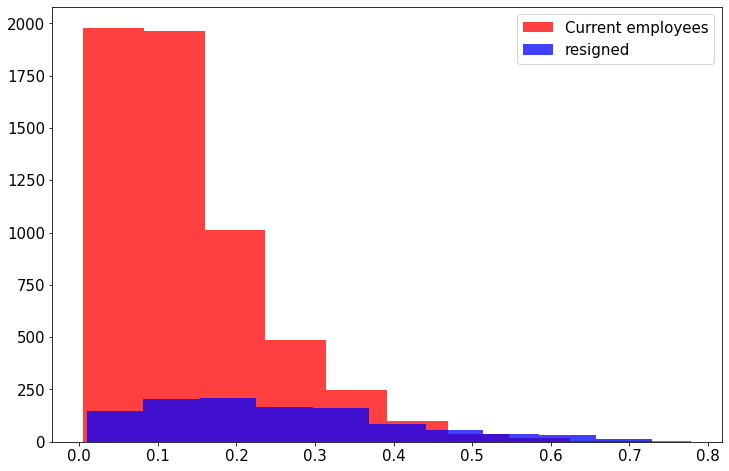

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

logr = LogisticRegression(max_iter=30000)

logr.fit(X_train, y_train)

preds = logr.predict(X_test)
logr_proba_preds = logr.predict_proba(X_test)[:, 1]
test_df['logr_proba_preds'] = logr.predict_proba(X_test)[:, 1]
cm = confusion_matrix(y_test, preds, normalize='true')
print(f'Confusion Matrix:')
print(cm)
dfacc = sum(y_test == preds) / len(y_test)
print(f'Accuracy = {dfacc}')
auroc = roc_auc_score(y_test, logr_proba_preds)
print(f'AUROC = {auroc}')
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]
tpr = TP/(TP+FN)
tnr = TN/(TN+FP) 
fpr = FP/(FP+TN)
fnr = FN/(TP+FN)
print(f'TNR: {tnr}')
print(f'TPR: {tpr}')
print(f'FPR: {fpr}')
print(f'FNR: {fnr}')

plt.figure(figsize=(12, 8))
plt.hist(test_df[test_df['Attrition'] == 0]['logr_proba_preds'], color='red', label='Current employees', alpha=0.75)
plt.hist(test_df[test_df['Attrition'] == 1]['logr_proba_preds'], color='blue', label='resigned', alpha=0.75)
plt.legend()

NOTE: 
- 0 = Current employee
- 1 = Resigned

% of resignations in our train dataset

In [67]:
resigned = (train_df[train_df['Attrition'] == 1].shape[0] / train_df.shape[0]) * 100
print(resigned)

15.767762590813938


## Balancing attrition

In [68]:
#take df and balance by attrition
def balanceDf(dfToBalance):
  rows = dfToBalance[(dfToBalance['Attrition'] == 1)].shape[0]
  dfResigned = dfToBalance[(dfToBalance['Attrition'] == 1)]
  dfCurrent = dfToBalance[(dfToBalance['Attrition'] == 0 )]
  dfCurrent = dfCurrent.sample(n = rows)

  assert dfResigned.shape[0] == dfCurrent.shape[0]

  dfBalanced = pd.concat([dfResigned, dfCurrent], axis=0)
  return dfBalanced

Confusion Matrix:
[[0.67475292 0.32524708]
 [0.34681042 0.65318958]]
Accuracy = 0.6639712488769093
AUROC = 0.7418485609504273
TNR: 0.6747529200359389
TPR: 0.6531895777178796
FPR: 0.3252470799640611
FNR: 0.3468104222821204
              precision    recall  f1-score   support

           0       0.66      0.67      0.67      1113
           1       0.67      0.65      0.66      1113

    accuracy                           0.66      2226
   macro avg       0.66      0.66      0.66      2226
weighted avg       0.66      0.66      0.66      2226



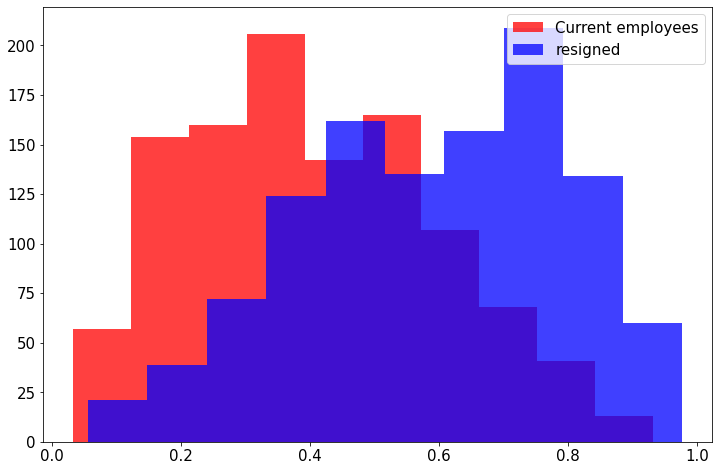

In [69]:
#balance df
train_df_blanced = balanceDf(train_df)
test_df_blanced = balanceDf(test_df)
test_df_blanced = test_df_blanced.drop(columns='logr_proba_preds')

#Set X y 
X_train = train_df_blanced.drop(columns='Attrition')
y_train = train_df_blanced['Attrition']
X_test = test_df_blanced.drop(columns='Attrition')
y_test = test_df_blanced['Attrition']

#Logistic regression
logr = LogisticRegression(max_iter=30000)
logr.fit(X_train, y_train)
preds = logr.predict(X_test)
test_df_blanced['logr_proba_preds'] = logr.predict_proba(X_test)[:, 1]
logr_proba_preds = logr.predict_proba(X_test)[:, 1]
# Model Analysis
cm = confusion_matrix(y_test, preds, normalize='true')
print(f'Confusion Matrix:')
print(cm)
dfacc = sum(y_test == preds) / len(y_test)
print(f'Accuracy = {dfacc}')
auroc = roc_auc_score(y_test, logr_proba_preds)
print(f'AUROC = {auroc}')
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]
tpr = TP/(TP+FN)
tnr = TN/(TN+FP) 
fpr = FP/(FP+TN)
fnr = FN/(TP+FN)
print(f'TNR: {tnr}')
print(f'TPR: {tpr}')
print(f'FPR: {fpr}')
print(f'FNR: {fnr}')

plt.figure(figsize=(12, 8))
plt.hist(test_df_blanced[test_df_blanced['Attrition'] == 0]['logr_proba_preds'], color='red', label='Current employees', alpha=0.75)
plt.hist(test_df_blanced[test_df_blanced['Attrition'] == 1]['logr_proba_preds'], color='blue', label='resigned', alpha=0.75)
plt.legend()

print(classification_report(y_test, preds))

## Coefficients

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60],
 [Text(0, 0, 'Age'),
  Text(1, 0, 'DailyRate'),
  Text(2, 0, 'DistanceFromHome'),
  Text(3, 0, 'Education'),
  Text(4, 0, 'EnvironmentSatisfaction'),
  Text(5, 0, 'Gender'),
  Text(6, 0, 'HourlyRate'),
  Text(7, 0, 'JobInvolvement'),
  Text(8, 0, 'JobLevel'),
  Text(9, 0, 'JobSatisfaction'),
  Text(10, 0, 'MonthlyIncome'),
  Text(11, 0, 'MonthlyRate'),
  Text(12, 0, 'NumCompaniesWorked'),
  Text(13, 0, 'OverTime'),
  Text(14, 0, 'PercentSalaryHike'),
  Text(15, 0, 'PerformanceRating'),
  Text(16, 0, 'RelationshipSatisfaction'),
  Text(17, 0, 'StandardHours'),
  Text(18, 0, 'StockOptionLevel'),
  Text(19, 0, 'TotalWorkingYears'),
  Text

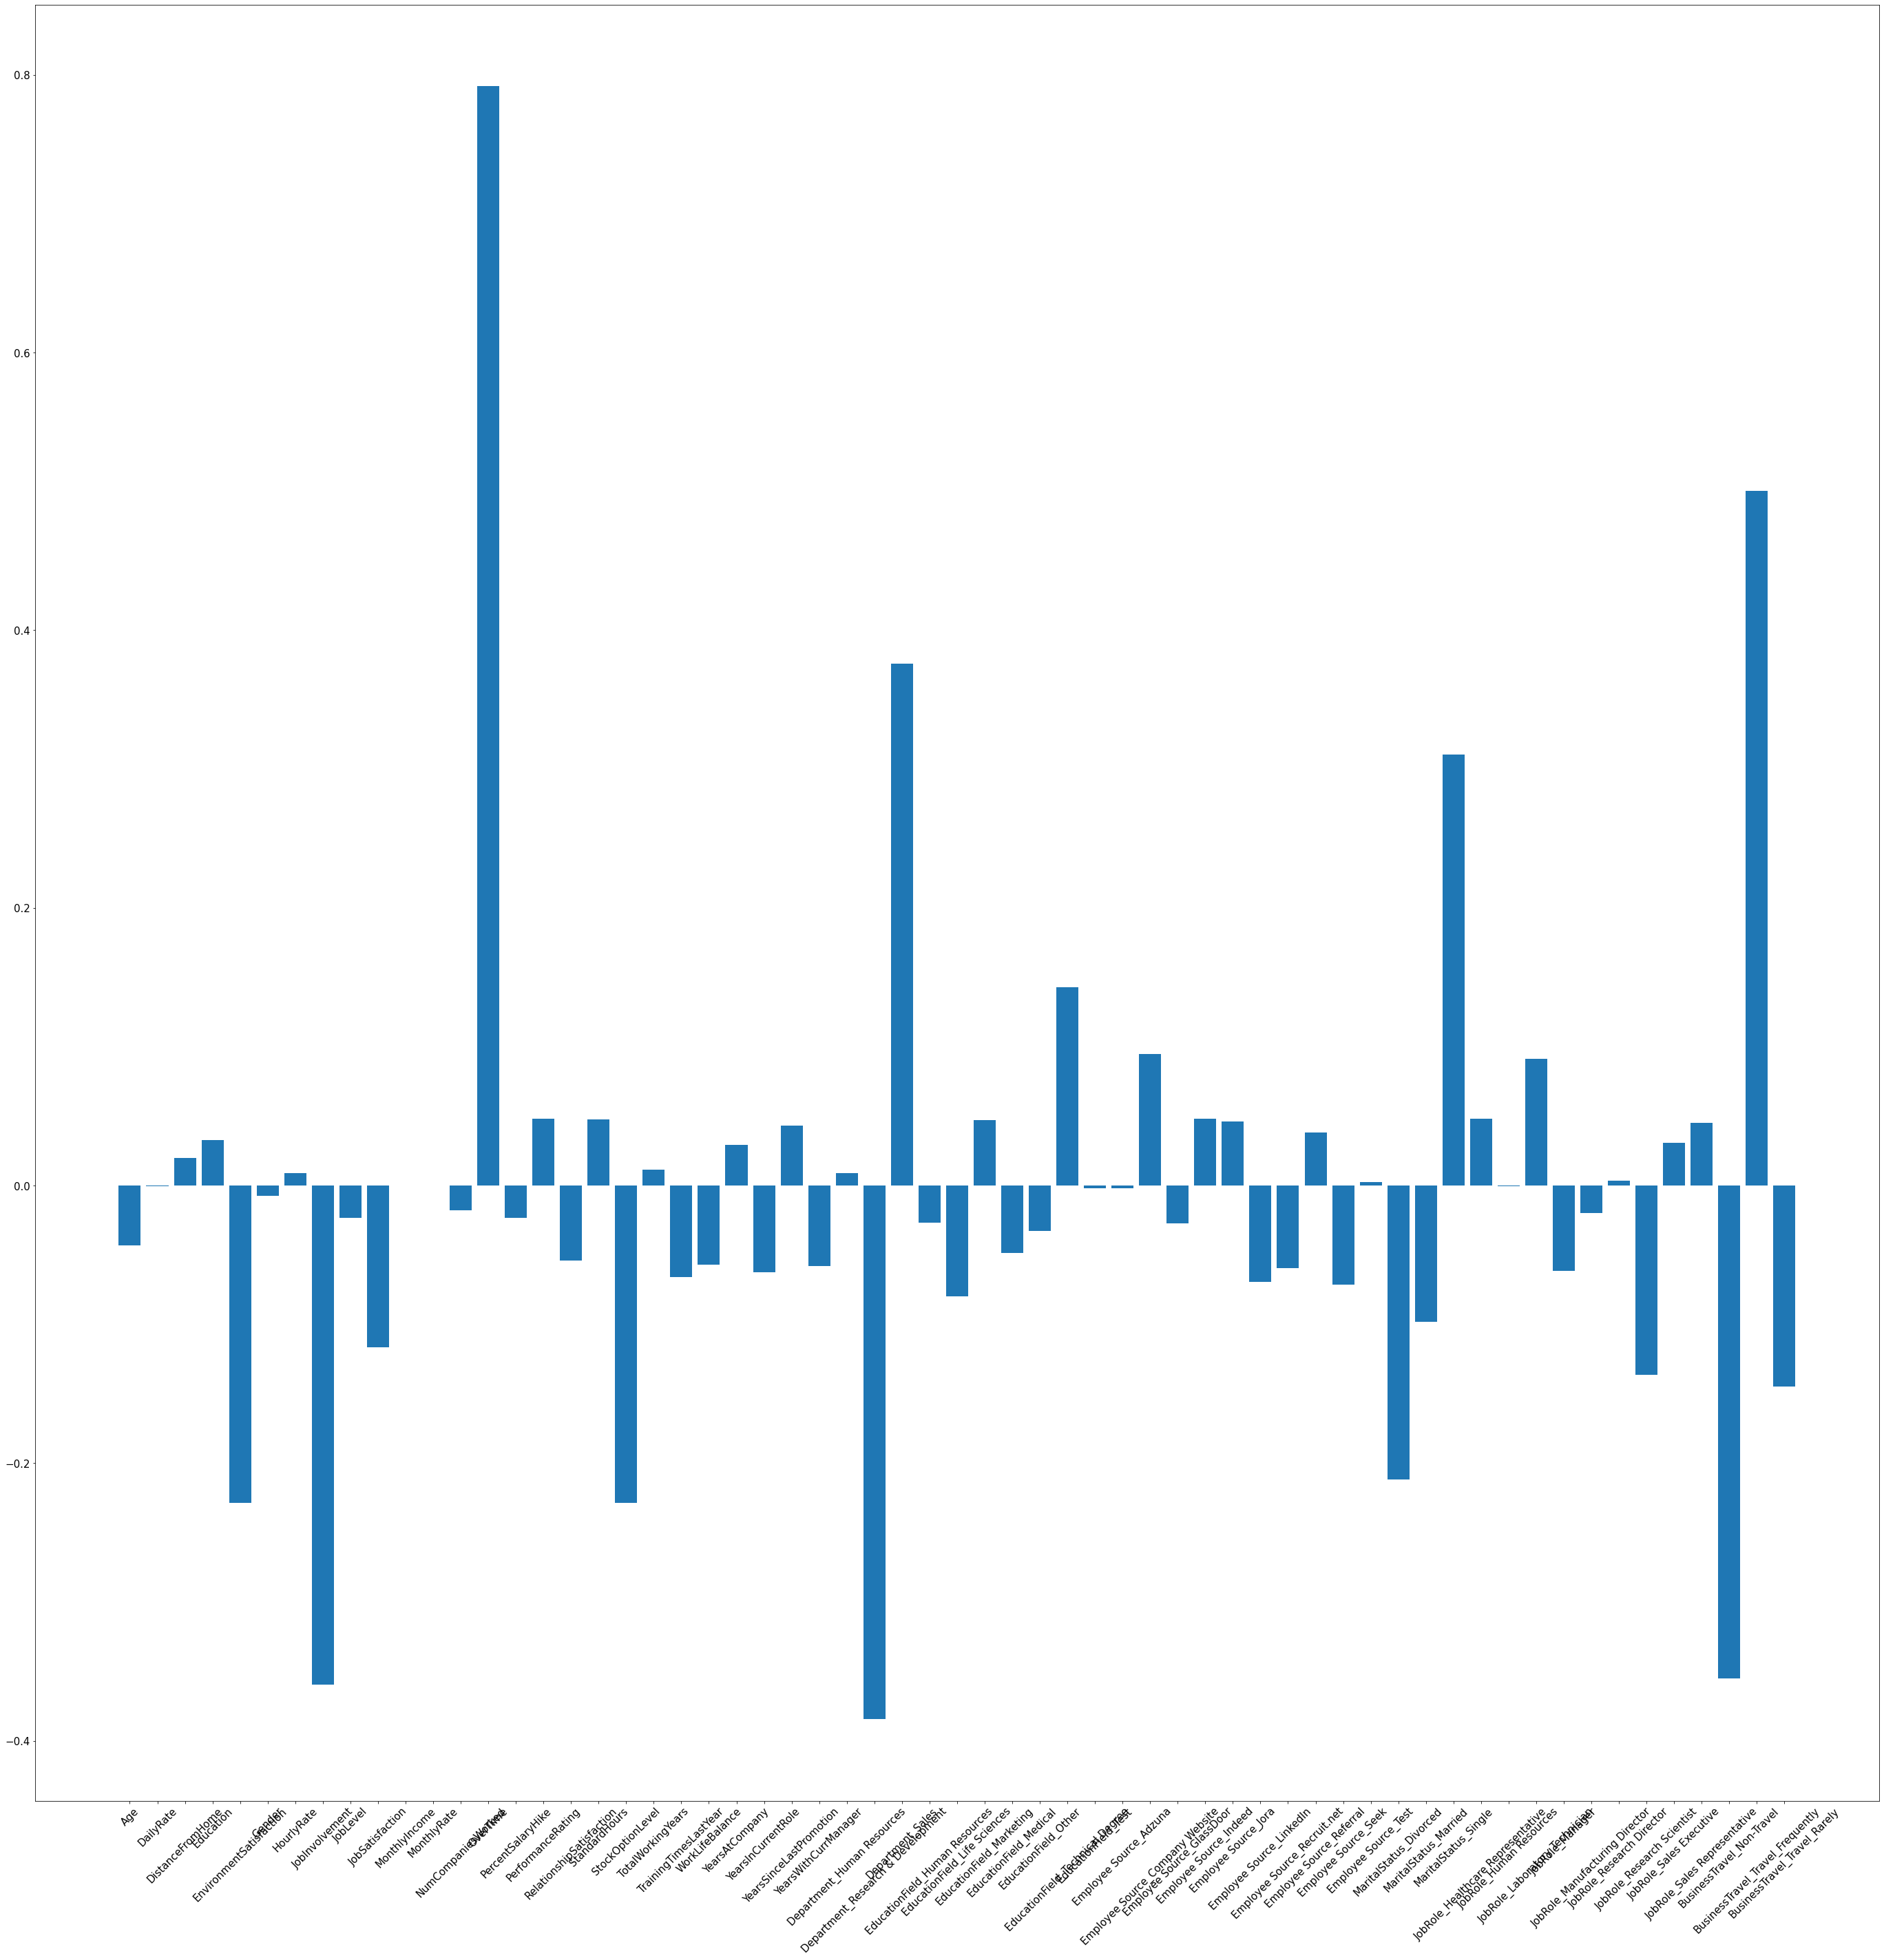

In [70]:
plt.figure(figsize=(48, 48))
plt.bar(x=X.columns, height=logr.coef_[0]) # The zero is needed because the coefficients are an array of arrays.
plt.xticks(rotation=45) # Rotate the labels so you can read them

# Simple analysis of attrition vs continous variables

In [90]:
df.select_dtypes('int').columns

Index(['Attrition', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'OverTime', 'PercentSalaryHike',
       'hasHighAttri_JR&JL', 'hasLowJobLevel', 'isYoung',
       'hasLowStockOptionLevel', 'hasLowYearsInCurrRole',
       'hasHighDistFromHome', 'sumOfBool'],
      dtype='object')

In [91]:
df.select_dtypes('float64').columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'MonthlyRate', 'NumCompaniesWorked',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

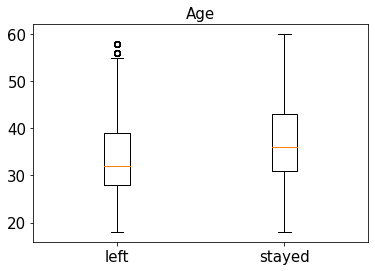

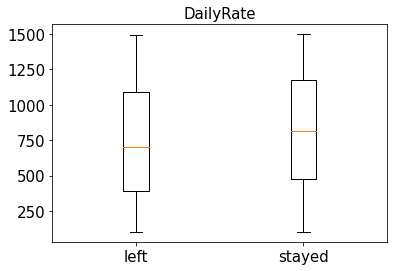

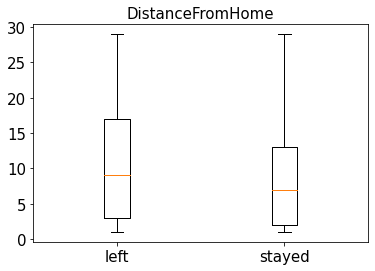

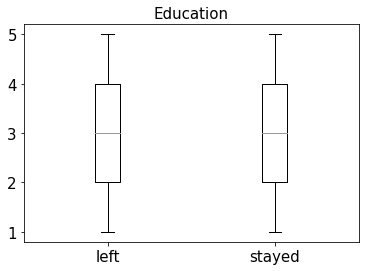

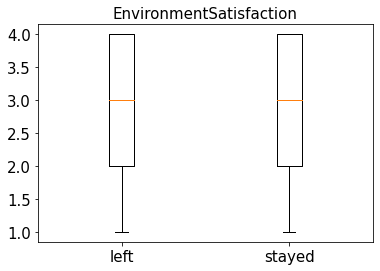

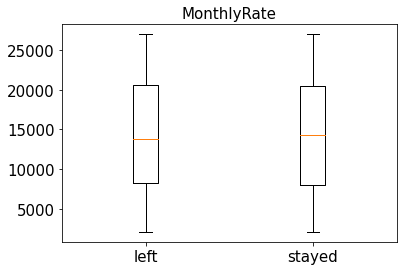

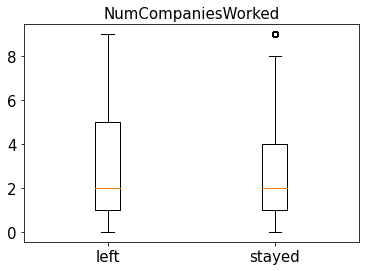

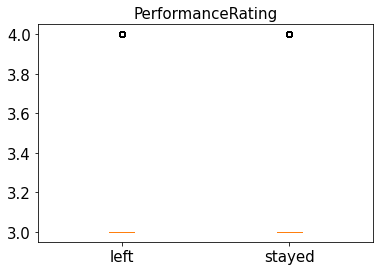

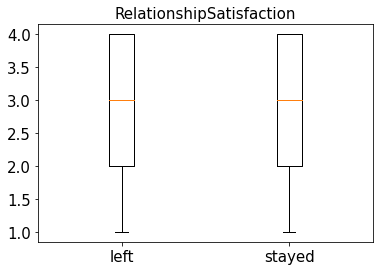

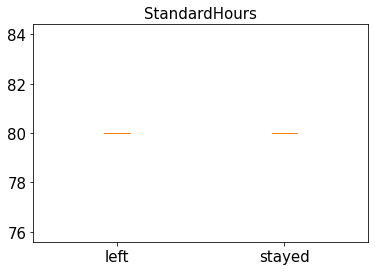

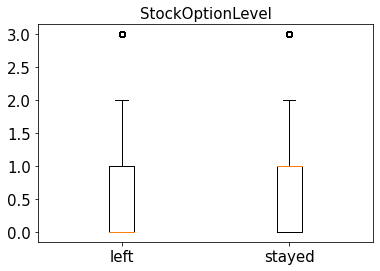

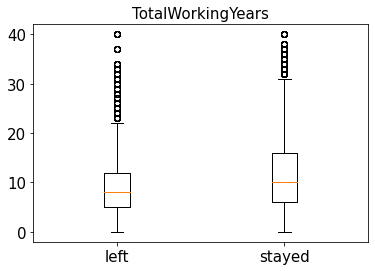

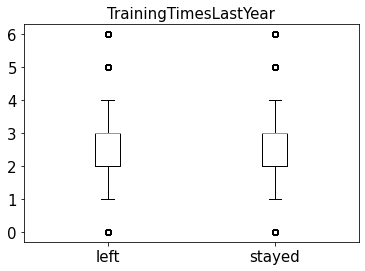

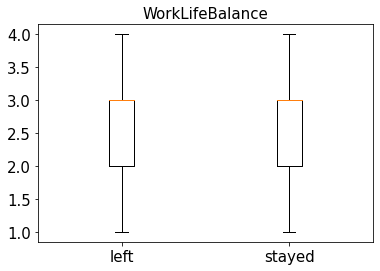

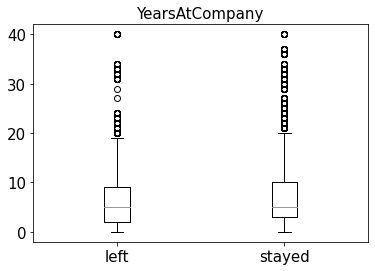

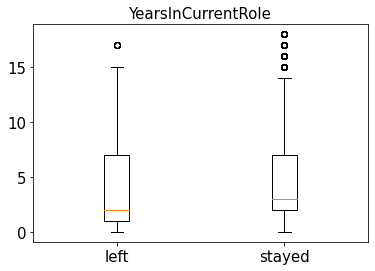

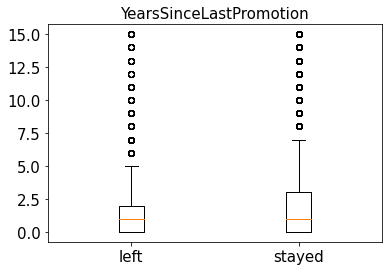

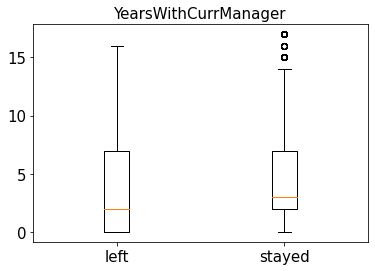

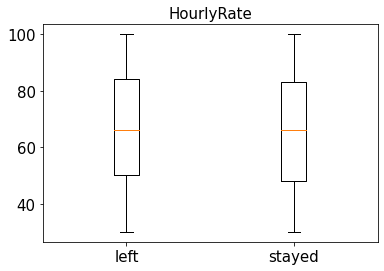

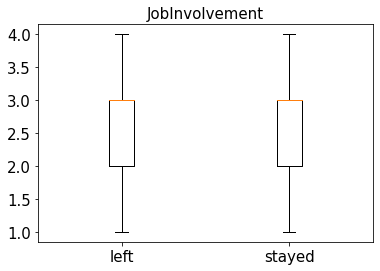

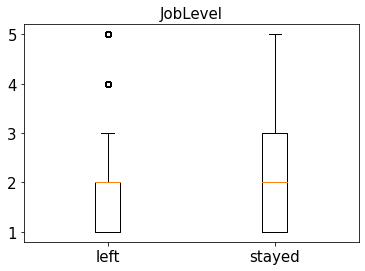

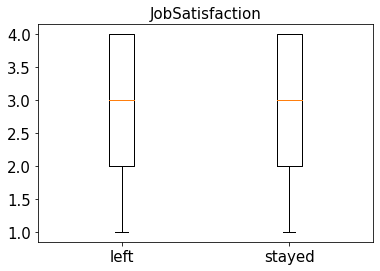

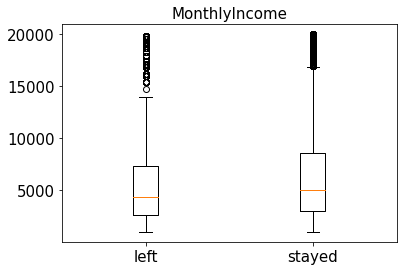

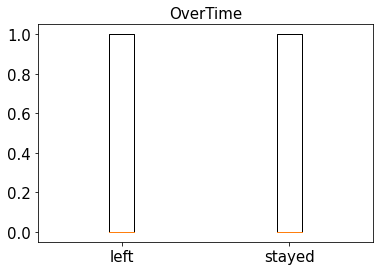

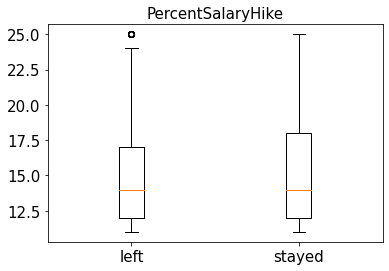

In [96]:
dfplots = df[['Age', 'DailyRate', 'DistanceFromHome', 'Education','EnvironmentSatisfaction', 'MonthlyRate', 
             'NumCompaniesWorked','PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
             'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
             'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
             'YearsSinceLastPromotion', 'YearsWithCurrManager', 'HourlyRate', 'JobInvolvement', 'JobLevel',
             'JobSatisfaction', 'MonthlyIncome', 'OverTime', 'PercentSalaryHike']]

dfLeft = df[(df['Attrition'] == 1)]
dfStayed = df[(df['Attrition'] == 0)]

columnsall = list(dfplots.columns)

for col in columnsall:
  left = dfLeft[col]
  stayed = dfStayed[col]
  data = [left, stayed]
  # Multiple box plots on one Axes
  fig, ax = plt.subplots()
  ax.boxplot(data)
  ax.set_title(col)
  plt.xticks([1, 2], ['left', 'stayed'])
  plt.show()

## Investigating job roles

Job roles:

In [73]:
filter_col = [col for col in df if col.startswith('JobRole')]
filter_col

for col in filter_col:
  print(col)

JobRole_Healthcare Representative
JobRole_Human Resources
JobRole_Laboratory Technician
JobRole_Manager
JobRole_Manufacturing Director
JobRole_Research Director
JobRole_Research Scientist
JobRole_Sales Executive
JobRole_Sales Representative


### Attrition per job role

In [74]:

dfLeft = df[(df['Attrition'] == 1)]
dfStayed = df[(df['Attrition'] == 0)]

filter_col = [col for col in df if col.startswith('JobRole')]

for col in filter_col:
  left = df[(df[col] == 1) & (df['Attrition'] == 1)].shape[0] / df[(df[col] == 1)].shape[0]
  print(f'% of {col} who left: {left*100:.2f}')

% of JobRole_Healthcare Representative who left: 13.96
% of JobRole_Human Resources who left: 17.66
% of JobRole_Laboratory Technician who left: 18.31
% of JobRole_Manager who left: 8.71
% of JobRole_Manufacturing Director who left: 12.20
% of JobRole_Research Director who left: 9.68
% of JobRole_Research Scientist who left: 16.11
% of JobRole_Sales Executive who left: 16.39
% of JobRole_Sales Representative who left: 28.02


## Investigating Job level

In [75]:

filter_col = df['JobLevel'].unique()

for col in filter_col:
  left = df[(df['JobLevel'] == col) & (df['Attrition'] == 1)].shape[0] / df[(df['JobLevel'] == col)].shape[0]
  print(f'% of {col} who left: {left*100:.2f}')

% of 2 who left: 12.79
% of 4 who left: 12.84
% of 5 who left: 8.22
% of 1 who left: 20.61
% of 3 who left: 15.30


## Combining sales representative and joblevel

In [76]:
filter_col = df['JobLevel'].unique()

for col in filter_col:
  left = df[(df['JobLevel'] == col) & (df['JobRole_Sales Representative'] == 1)].shape[0] / df[(df['JobRole_Sales Representative'] == 1)].shape[0]
  print(f'% of Job level {col} in sales rep: {left*100:.2f}')

% of Job level 2 in sales rep: 8.93
% of Job level 4 in sales rep: 0.00
% of Job level 5 in sales rep: 0.00
% of Job level 1 in sales rep: 90.76
% of Job level 3 in sales rep: 0.31


In [77]:
filter_col = df['JobLevel'].unique()

for col in filter_col:
  left_total = df[(df['JobRole_Sales Representative'] == 1) & (df['Attrition'] == 1)].shape[0]
  if left_total > 0 :
    left = df[(df['JobLevel'] == col) & (df['JobRole_Sales Representative'] == 1) & (df['Attrition'] == 1)].shape[0] / df[(df['JobRole_Sales Representative'] == 1) & (df['Attrition'] == 1)].shape[0]
    print(f'Amongst all the sales rep who quit, {left*100:.2f}% had a job level of {col} ')

Amongst all the sales rep who quit, 3.85% had a job level of 2 
Amongst all the sales rep who quit, 0.00% had a job level of 4 
Amongst all the sales rep who quit, 0.00% had a job level of 5 
Amongst all the sales rep who quit, 96.15% had a job level of 1 
Amongst all the sales rep who quit, 0.00% had a job level of 3 


## Combining high attrition job role with job level and looking at attrition for these micro-categories

In [78]:
def combiningJLandJR():
  dfLeft = df[(df['Attrition'] == 1)]

  filter_col = [col for col in df if col.startswith('JobRole')]

  for jobrole in filter_col:
    left = df[(df[jobrole] == 1) & (df['Attrition'] == 1)].shape[0] / df[(df[jobrole] == 1)].shape[0]
    if left > 0.12:
      filter_col_JL = df['JobLevel'].unique()
      for jl in filter_col_JL:
        left_total = df[(df[jobrole] == 1) & (df['Attrition'] == 1)].shape[0]
        if left_total > 0 :
          left_jr_jl = df[(df['JobLevel'] == jl) & (df[jobrole] == 1) & (df['Attrition'] == 1)].shape[0] / left_total
          if left_jr_jl >= 0.5:
            print(f'Amongst all the {jobrole} who quit, {left_jr_jl*100:.2f}% had a job level of {jl}')

In [79]:
combiningJLandJR()

Amongst all the JobRole_Healthcare Representative who quit, 55.86% had a job level of 2
Amongst all the JobRole_Human Resources who quit, 75.68% had a job level of 1
Amongst all the JobRole_Laboratory Technician who quit, 85.64% had a job level of 1
Amongst all the JobRole_Manufacturing Director who quit, 50.35% had a job level of 2
Amongst all the JobRole_Research Scientist who quit, 87.57% had a job level of 1
Amongst all the JobRole_Sales Executive who quit, 66.75% had a job level of 2
Amongst all the JobRole_Sales Representative who quit, 96.15% had a job level of 1


## Combining high attrition role and job level

In [80]:
dfCombinedBalanced = df
conditions = [((dfCombinedBalanced['JobLevel'] == 2.0) & (dfCombinedBalanced['JobRole_Healthcare Representative'] == 1)),
              ((dfCombinedBalanced['JobLevel'] == 1.0) & (dfCombinedBalanced['JobRole_Human Resources'] == 1)),
              ((dfCombinedBalanced['JobLevel'] == 1.0) & (dfCombinedBalanced['JobRole_Laboratory Technician'] == 1)) ,
              ((dfCombinedBalanced['JobLevel'] == 2.0) & (dfCombinedBalanced['JobRole_Manufacturing Director'] == 1)) ,
              ((dfCombinedBalanced['JobLevel'] == 1.0) & (dfCombinedBalanced['JobRole_Research Scientist'] == 1)),
              ((dfCombinedBalanced['JobLevel'] == 2.0) & (dfCombinedBalanced['JobRole_Sales Executive'] == 1)),
              ((dfCombinedBalanced['JobLevel'] == 1.0) & (dfCombinedBalanced['JobRole_Sales Representative'] == 1))]
returnval = [1,1,1,1,1,1,1]
dfCombinedBalanced['hasHighAttri_JR&JL'] = np.select(conditions, returnval)
df[dfCombinedBalanced['Attrition'] == 1 ].shape[0] / df[dfCombinedBalanced['hasHighAttri_JR&JL'] == 1 ].shape[0] 

0.2474573988011046

## Combining factors

In [81]:

dfCombinedBalanced['hasLowJobLevel'] = np.where(dfCombinedBalanced['JobLevel'] < 3, 1, 0)
dfCombinedBalanced['isYoung'] = np.where(dfCombinedBalanced['Age'] < 39, 1, 0)
dfCombinedBalanced['hasLowStockOptionLevel'] = np.where(dfCombinedBalanced['StockOptionLevel'] < 0.5, 1, 0)
dfCombinedBalanced['hasLowYearsInCurrRole'] = np.where(dfCombinedBalanced['YearsInCurrentRole'] < 2, 1, 0)
dfCombinedBalanced['hasHighDistFromHome'] = np.where(dfCombinedBalanced['DistanceFromHome'] > 10, 1, 0)
dfCombinedBalanced['sumOfBool'] = dfCombinedBalanced[['hasLowJobLevel',  'isYoung','hasLowStockOptionLevel', 'hasLowYearsInCurrRole','hasHighDistFromHome']].sum(axis=1)
dfCombinedBalanced.drop(columns = ['hasLowJobLevel', 'isYoung', 'hasLowStockOptionLevel', 'hasLowYearsInCurrRole','hasHighDistFromHome'])
dfCombinedBalanced.drop(columns = ['JobLevel', 'Age', 'StockOptionLevel', 'YearsInCurrentRole','DistanceFromHome'])

dfCombinedBalanced.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,hasHighAttri_JR&JL,hasLowJobLevel,isYoung,hasLowStockOptionLevel,hasLowYearsInCurrRole,hasHighDistFromHome,sumOfBool
0,41.0,1,1102.0,1.0,2.0,2.0,0,94,3,2,...,0,0,1,1,1,0,1,0,0,2
1,41.0,1,1102.0,1.0,2.0,2.0,0,94,3,2,...,0,0,1,1,1,0,1,0,0,2
2,41.0,1,1102.0,1.0,2.0,2.0,0,94,3,2,...,0,0,1,1,1,0,1,0,0,2
3,41.0,1,1102.0,1.0,2.0,2.0,0,94,3,2,...,0,0,1,1,1,0,1,0,0,2
4,41.0,1,1102.0,1.0,2.0,2.0,0,94,3,2,...,0,0,1,1,1,0,1,0,0,2


### Trying logistic regression with: split & balanced data, and new boolean column

Confusion Matrix:
[[0.66932624 0.33067376]
 [0.31294326 0.68705674]]
Accuracy = 0.6781914893617021
AUROC = 0.744103981188069
TNR: 0.6693262411347518
TPR: 0.6870567375886525
FPR: 0.33067375886524825
FNR: 0.3129432624113475
              precision    recall  f1-score   support

           0       0.68      0.67      0.68      1128
           1       0.68      0.69      0.68      1128

    accuracy                           0.68      2256
   macro avg       0.68      0.68      0.68      2256
weighted avg       0.68      0.68      0.68      2256



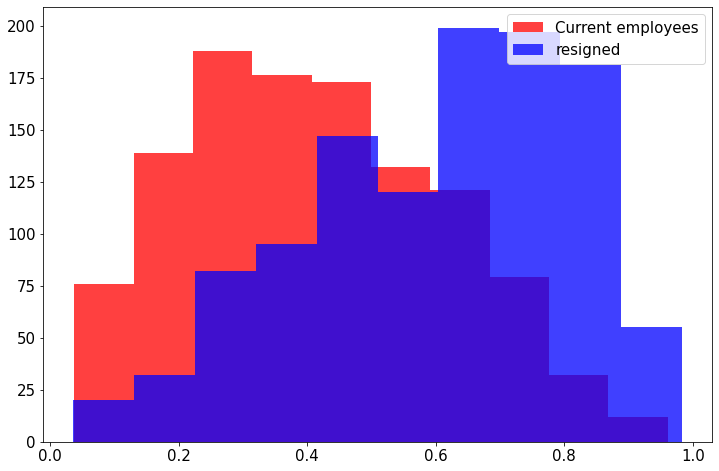

In [82]:
train_df_blanced_bool, test_df_blanced_bool = train_test_split(dfCombinedBalanced, test_size=0.3)

#balance df
train_df_blanced_bool = balanceDf(train_df_blanced_bool)
test_df_blanced_bool = balanceDf(test_df_blanced_bool)

#Set X y 
X_train_blanced_bool = train_df_blanced_bool.drop(columns='Attrition')
y_train_blanced_bool = train_df_blanced_bool['Attrition']
X_test_blanced_bool = test_df_blanced_bool.drop(columns='Attrition')
y_test_blanced_bool = test_df_blanced_bool['Attrition']

#Logistic regression
logr2 = LogisticRegression(max_iter=30000)
logr2.fit(X_train_blanced_bool, y_train_blanced_bool)
preds = logr2.predict(X_test_blanced_bool)
test_df_blanced_bool['logr_proba_preds'] = logr2.predict_proba(X_test_blanced_bool)[:, 1]
logr_proba_preds = logr2.predict_proba(X_test_blanced_bool)[:, 1]
# Model Analysis
cm = confusion_matrix(y_test_blanced_bool, preds, normalize='true')
print(f'Confusion Matrix:')
print(cm)
dfacc = sum(y_test_blanced_bool == preds) / len(y_test_blanced_bool)
print(f'Accuracy = {dfacc}')
auroc = roc_auc_score(y_test_blanced_bool, logr_proba_preds)
print(f'AUROC = {auroc}')
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]
tpr = TP/(TP+FN)
tnr = TN/(TN+FP) 
fpr = FP/(FP+TN)
fnr = FN/(TP+FN)
print(f'TNR: {tnr}')
print(f'TPR: {tpr}')
print(f'FPR: {fpr}')
print(f'FNR: {fnr}')

plt.figure(figsize=(12, 8))
plt.hist(test_df_blanced_bool[test_df_blanced_bool['Attrition'] == 0]['logr_proba_preds'], color='red', label='Current employees', alpha=0.75)
plt.hist(test_df_blanced_bool[test_df_blanced_bool['Attrition'] == 1]['logr_proba_preds'], color='blue', label='resigned', alpha=0.75)
plt.legend()

print(classification_report(y_test_blanced_bool, preds))

# Nearest neighbour analysis

In [83]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay

def knnAnalysis(X_train, y_train, X_test, y_test, n, metric, dfKnn):
  knn = KNeighborsClassifier(n_neighbors=n, metric=metric)
  knn.fit(X_train, y_train)
  preds = knn.predict(X_test)
  acc = knn.score(X_test, y_test)
  y_pred_proba = knn.predict_proba(X_test)[:,1]
  knn_acc = knn.score(X_test, y_test)
  knn_auroc = roc_auc_score(y_test, y_pred_proba)
  cm = confusion_matrix(y_test, preds, normalize='true')
  dfKnn['knn_preds'] = y_pred_proba

  print(f'Confusion Matrix:')
  print(cm)
  print(f'Accuracy = {knn_acc}')
  print(f'AUROC = {knn_auroc}')
  print(f'Confusion Matrix = {cm}')
  print(classification_report(y_test, preds))
  plt.figure(figsize=(12, 8))
  plt.hist(dfKnn[dfKnn['Attrition'] == 0]['knn_preds'], color='red', label='Current employees', alpha=0.75)
  plt.hist(dfKnn[dfKnn['Attrition'] == 1]['knn_preds'], color='blue', label='resigned', alpha=0.75)
  plt.legend()
  plt.show()
  ConfusionMatrixDisplay.from_predictions(y_test, y_pred_proba, normalize='true')
  plt.show()
  plt.figure(figsize=(48, 48))
  plt.bar(x=X.columns, height=knn.coef_[0]) # The zero is needed because the coefficients are an array of arrays.
  plt.xticks(rotation=45) # Rotate the labels so you can read them
  plt.show()

## Re-importing / Cleaning

In [97]:
df = pd.read_csv('/content/drive/MyDrive/Project 3 : Math 3439/data/IBM HR Data new.csv')
df.head()
df = df.dropna()
df['JobLevel'] = df['JobLevel'].astype(int)
df['JobInvolvement'] = df['JobInvolvement'].astype(int)

df['DistanceFromHome'] = pd.to_numeric(df['DistanceFromHome'], errors='coerce')
df['HourlyRate'] = pd.to_numeric(df['HourlyRate'], errors='coerce')
df['JobSatisfaction'] = pd.to_numeric(df['JobSatisfaction'], errors='coerce')
df['MonthlyIncome'] = pd.to_numeric(df['MonthlyIncome'], errors='coerce')
df['PercentSalaryHike'] = pd.to_numeric(df['PercentSalaryHike'], errors='coerce')

attrition_le = LabelEncoder()
df['Attrition'] = attrition_le.fit_transform(df['Attrition'])
OverTime_le = LabelEncoder()
df['OverTime'] = OverTime_le.fit_transform(df['OverTime'])
Gender_le = LabelEncoder()
df['Gender'] = OverTime_le.fit_transform(df['Gender'])

# get dummies for: Department, EducationField, Employee Source,  MaritalStatus(3), JobRole
df = pd.concat([df, pd.get_dummies(df['Department'], prefix='Department')], axis=1)
df = pd.concat([df, pd.get_dummies(df['EducationField'], prefix='EducationField')], axis=1)
df = pd.concat([df, pd.get_dummies(df['MaritalStatus'], prefix='MaritalStatus')], axis=1)
df = pd.concat([df, pd.get_dummies(df['JobRole'], prefix='JobRole')], axis=1)
df = pd.concat([df, pd.get_dummies(df['BusinessTravel'], prefix='BusinessTravel')], axis=1)

df = df.drop(columns=['JobRole', 'MaritalStatus', 'Employee Source', 'EducationField', 'Department', 'BusinessTravel', 'EmployeeNumber', 'EmployeeCount', 'Application ID', 'Over18'])
df = df.drop_duplicates()
df = df.dropna()

<ipython-input-97-ffbb69e26202>:1: DtypeWarning: Columns (5,8,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Project 3 : Math 3439/data/IBM HR Data new.csv')
<ipython-input-97-ffbb69e26202>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['JobLevel'] = df['JobLevel'].astype(int)
<ipython-input-97-ffbb69e26202>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['JobInvolvement'] = df['JobInvolvement'].astype(int)
<ipython-input-97-

### Using GridSearchCV

In [85]:
def gridSearchCVKnn(X_train, y_train, X_test):
  n = list(range(1, 2))
  hyperparam_grid = {'n_neighbors': n, 'metric': ['hamming', 'euclidean', 'jaccard']}
  knn = KNeighborsClassifier()
  grid = GridSearchCV(knn, hyperparam_grid, n_jobs=-1) # n_jobs tells it to use parallel processing. Long story short, it will be faster.
  grid.fit(X_train, y_train)
  grid.predict(X_test)
  print(f'Best number of neighbours: {grid.best_params_}')
  print(f'Accuracy: {grid.best_score_ *100}')
  return grid

## Stratified data

In [98]:

train_df, test_df = train_test_split(df, train_size=0.7, stratify=df['Attrition'])

X_train = train_df.drop('Attrition', axis=1)
y_train = train_df['Attrition']

X_test = test_df.drop('Attrition', axis=1)
y_test = test_df['Attrition']

In [99]:
train_df['Attrition'].value_counts(normalize=True)

0    0.836157
1    0.163843
Name: Attrition, dtype: float64

### no combination of factors

In [101]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Use a grid search with possible neighbors [1, 5, 10, 15, 20, 30] to find which number of neighbors is best. 
knn_clf = KNeighborsClassifier()
knn_params = {'n_neighbors': [1, 5, 10, 15, 20, 30],'metric': ['hamming', 'euclidean']}

grid_search_knn = GridSearchCV(knn_clf, knn_params)
grid_search_knn.fit(X_train, y_train)
knn_acc = accuracy_score(y_test, grid_search_knn.predict(X_test))
y_pred_probaCV = grid_search_knn.predict_proba(X_test)[:,1]
test_df['knn_preds'] = y_pred_probaCV

# find which number of neighbors is best. 
grid_search_knn.best_params_

{'metric': 'hamming', 'n_neighbors': 1}

In [102]:
print(f'Accuracy: {grid_search_knn.best_score_ *100}')

Accuracy: 92.99563318777292


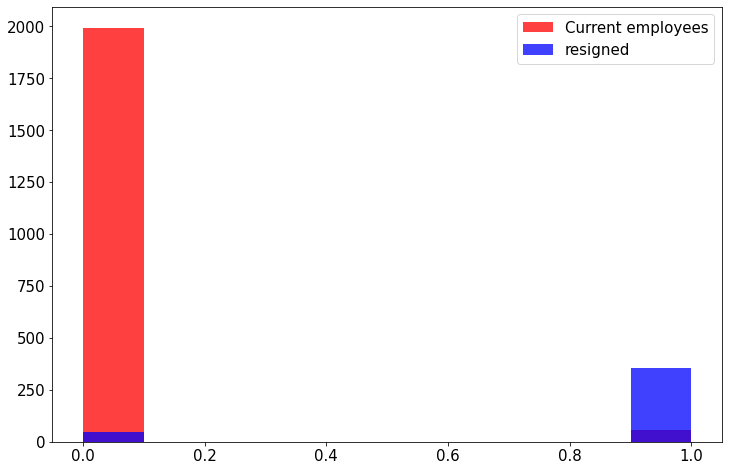

In [103]:
plt.figure(figsize=(12, 8))
plt.hist(test_df[test_df['Attrition'] == 0]['knn_preds'], color='red', label='Current employees', alpha=0.75)
plt.hist(test_df[test_df['Attrition'] == 1]['knn_preds'], color='blue', label='resigned', alpha=0.75)
plt.legend()
plt.show()

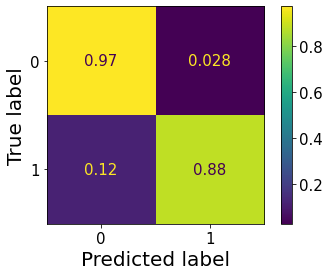

In [104]:
ConfusionMatrixDisplay.from_predictions(y_test, grid_search_knn.predict(X_test), normalize='true')
plt.show()

##Investigating wrong predictions: R&D

In [106]:
dfwrong = test_df[test_df['Attrition'] != test_df['knn_preds']]
dfwrong.shape[0]

106

<ipython-input-107-848283c18ab4>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(12, 8))


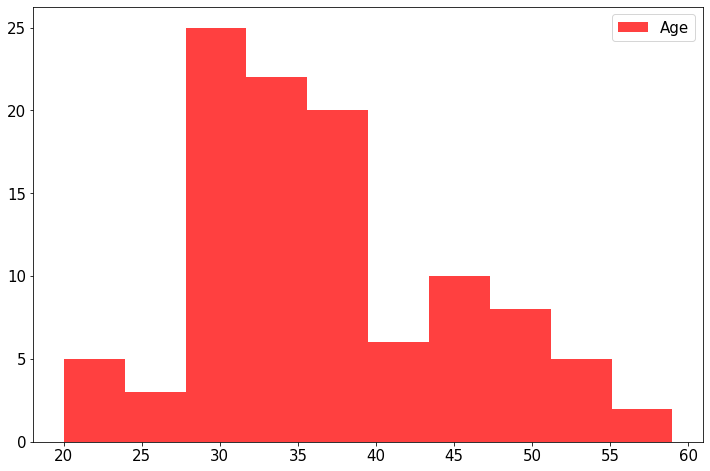

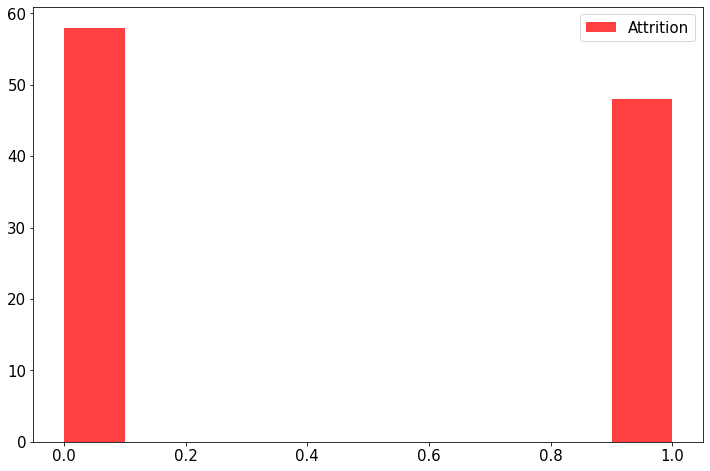

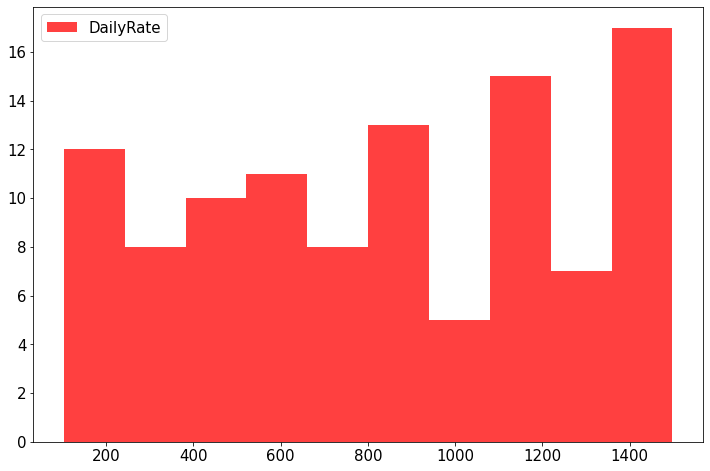

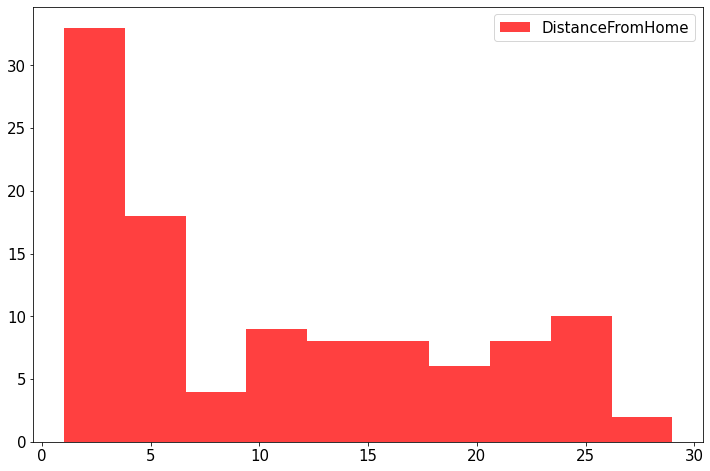

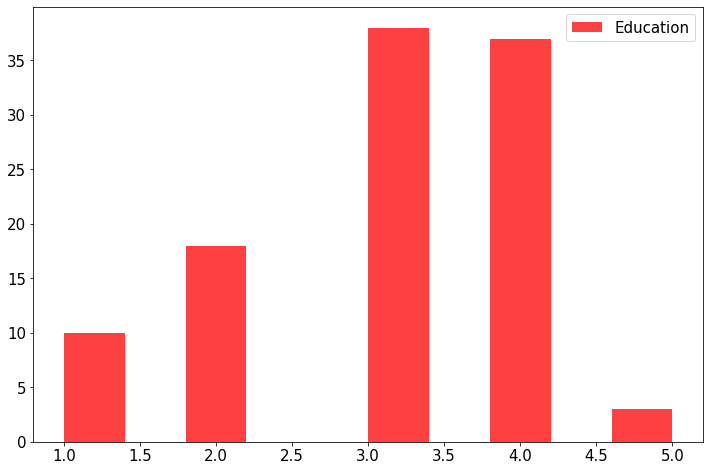

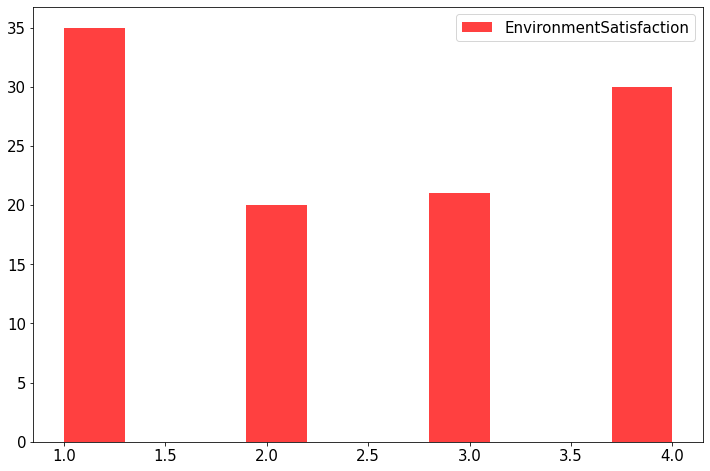

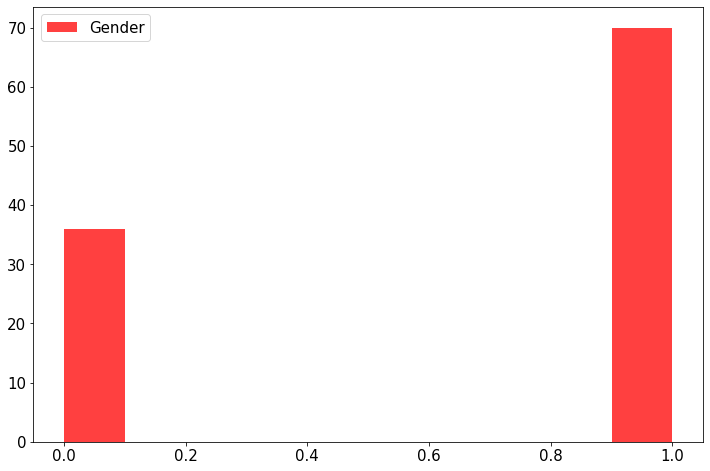

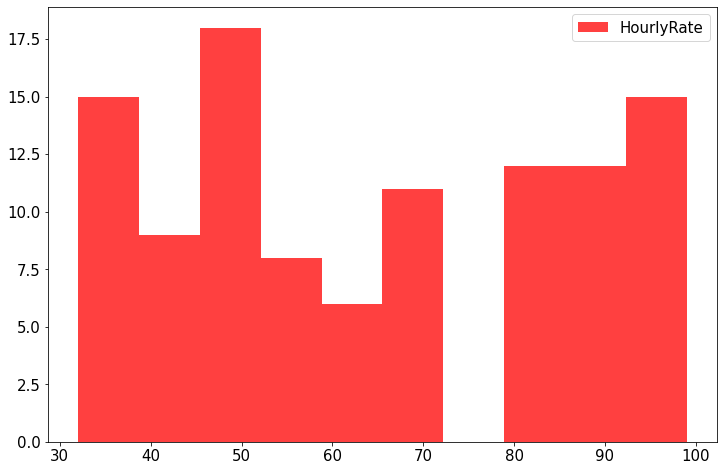

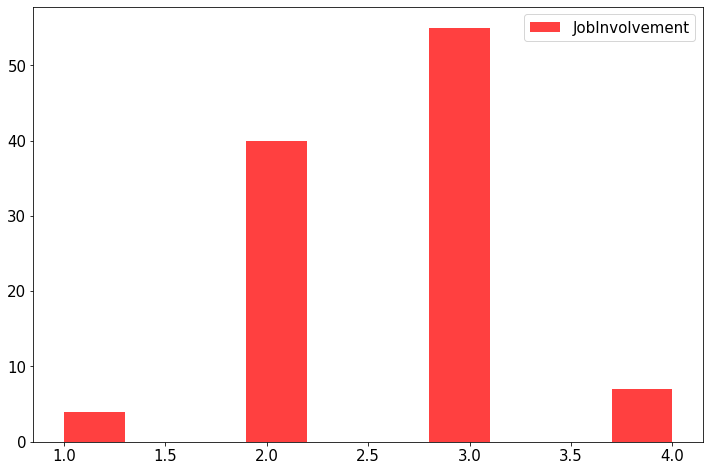

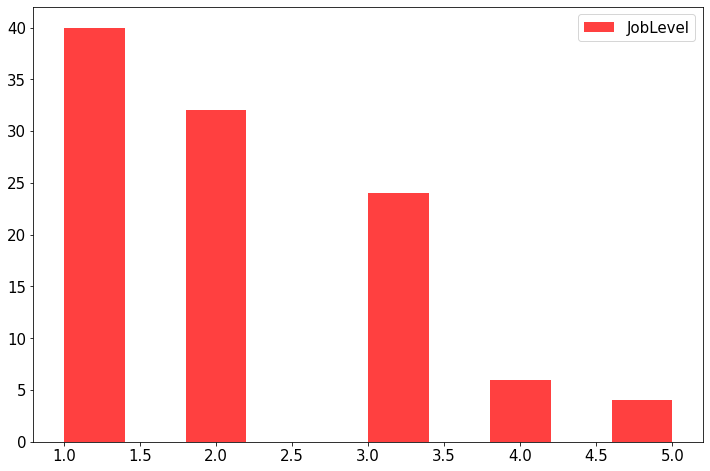

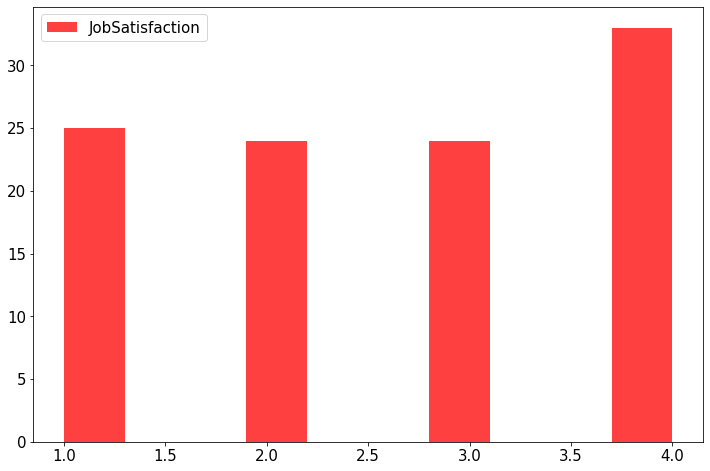

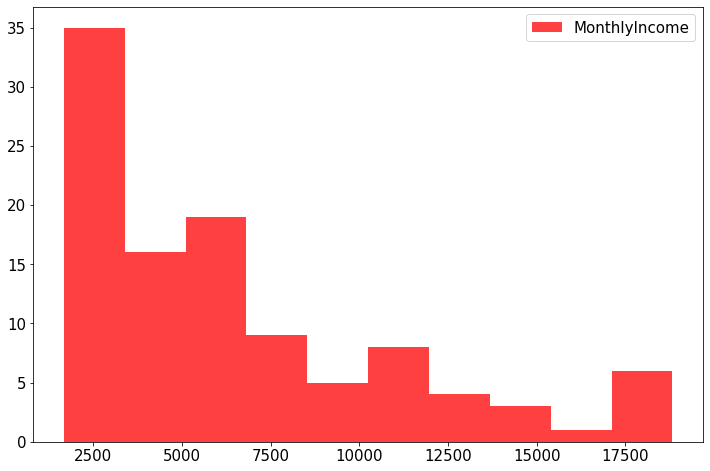

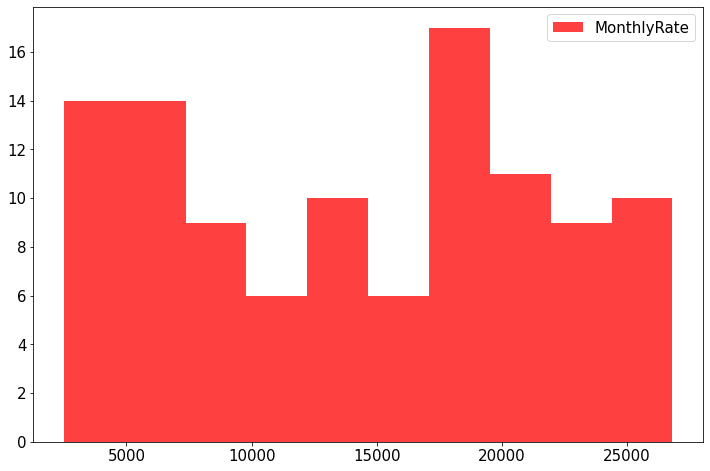

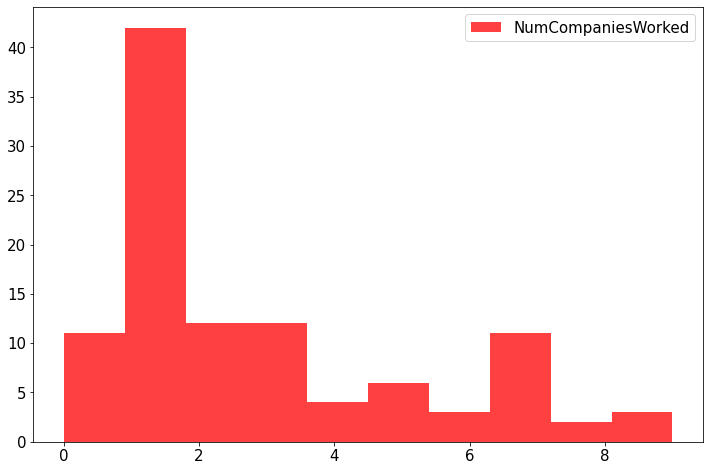

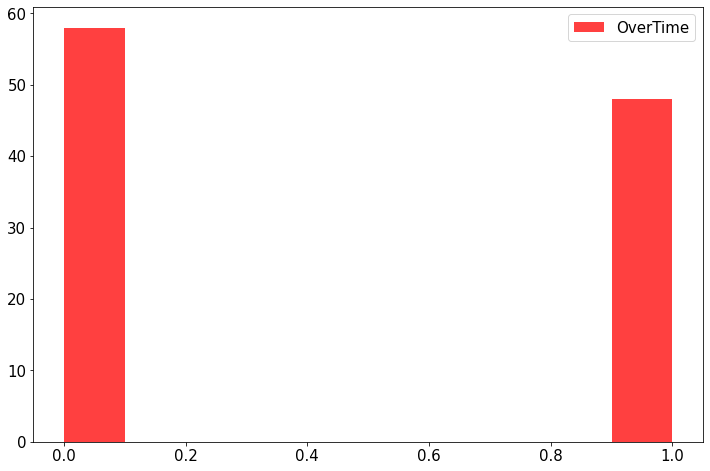

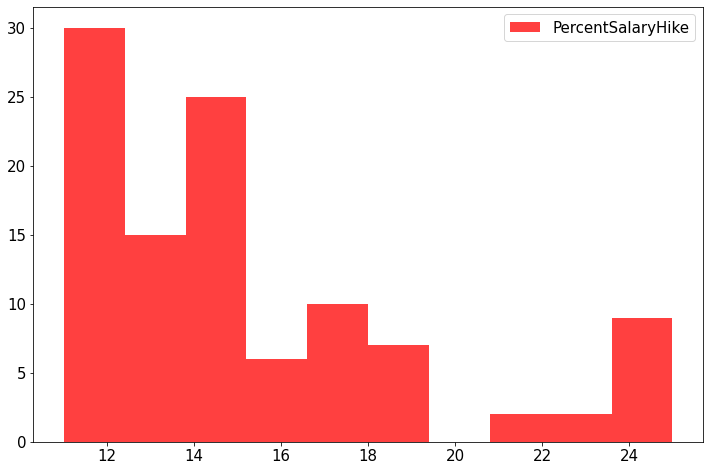

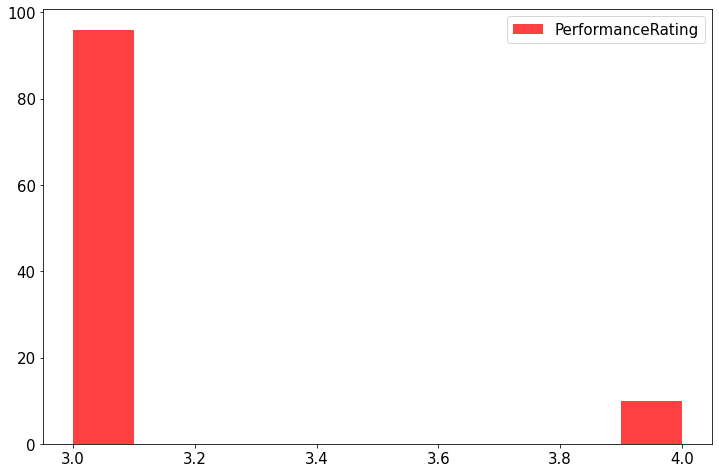

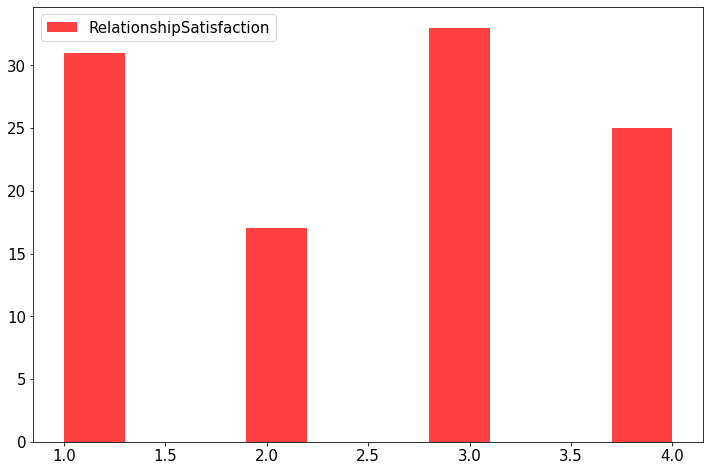

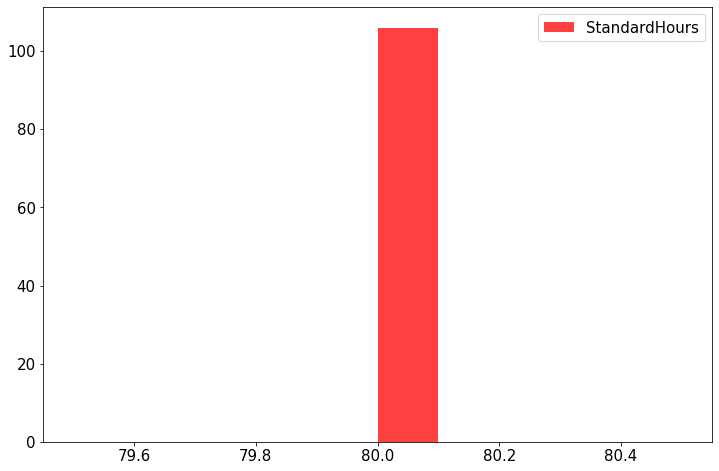

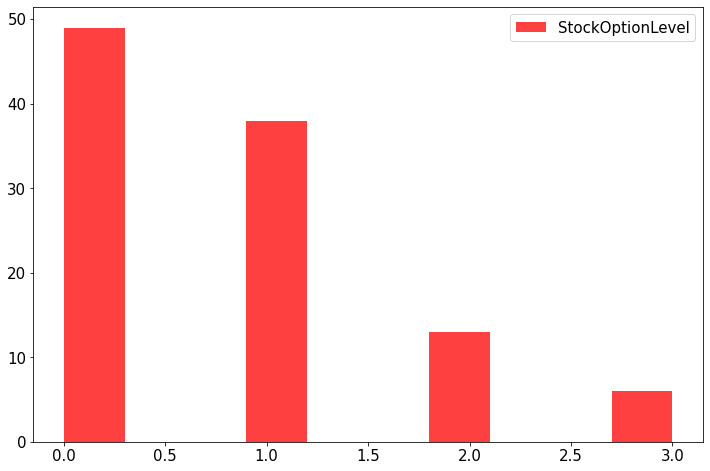

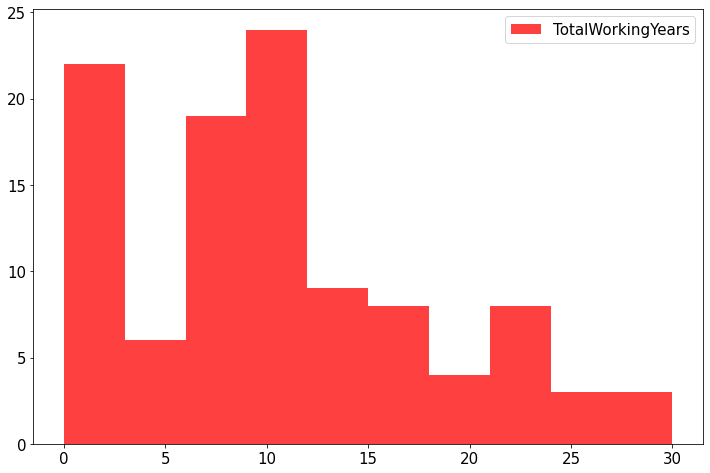

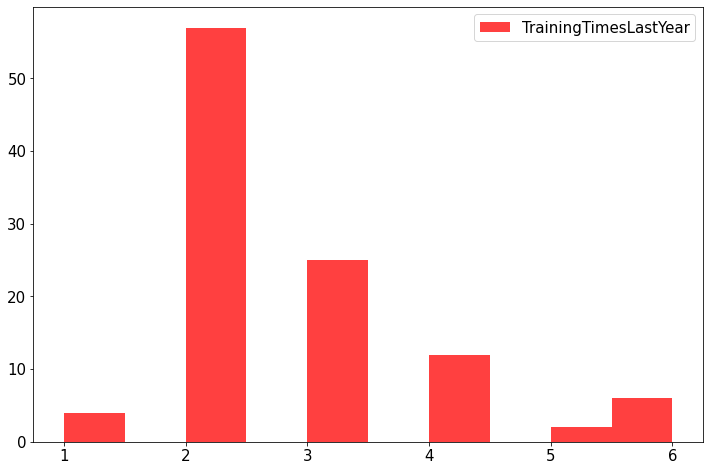

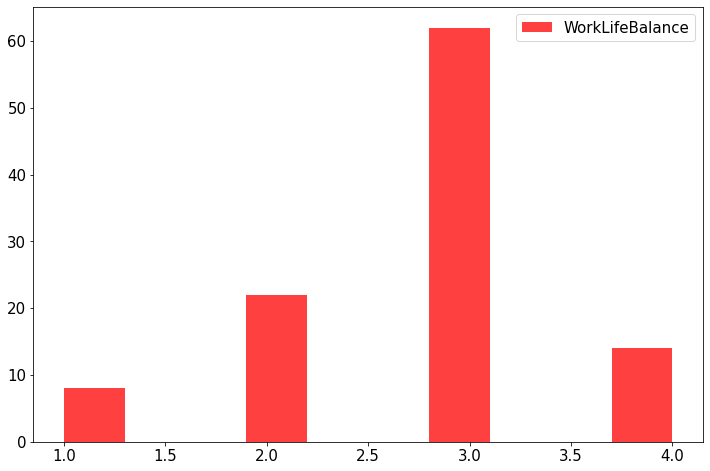

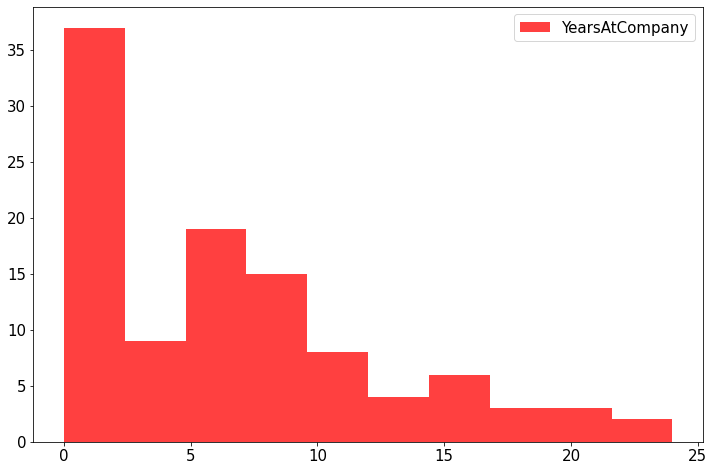

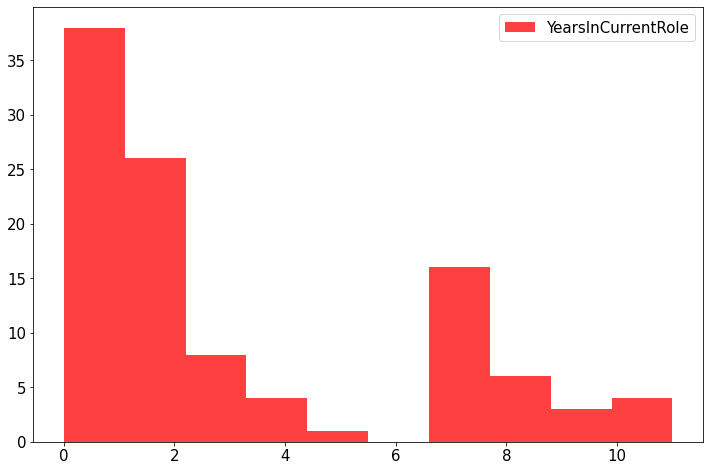

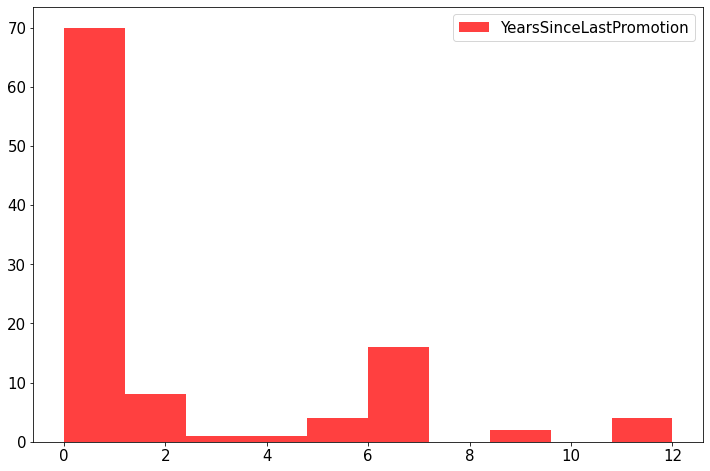

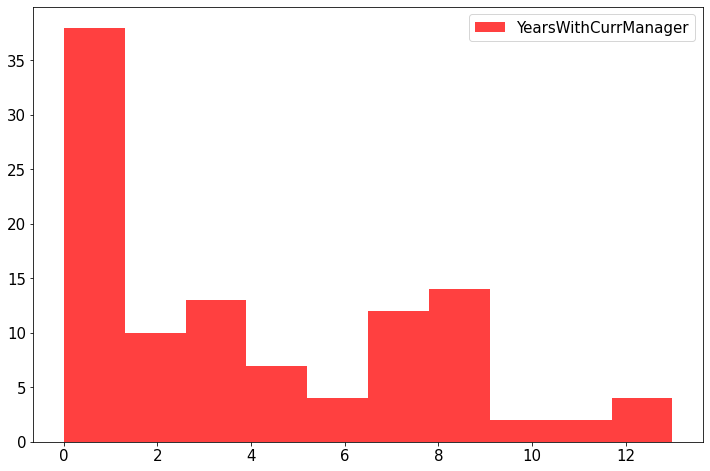

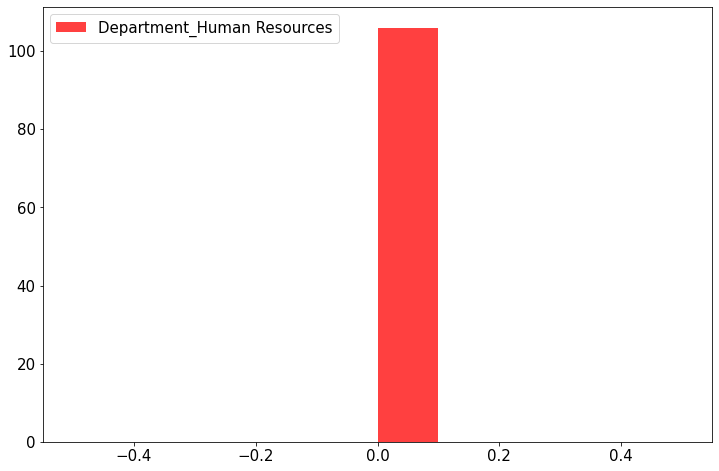

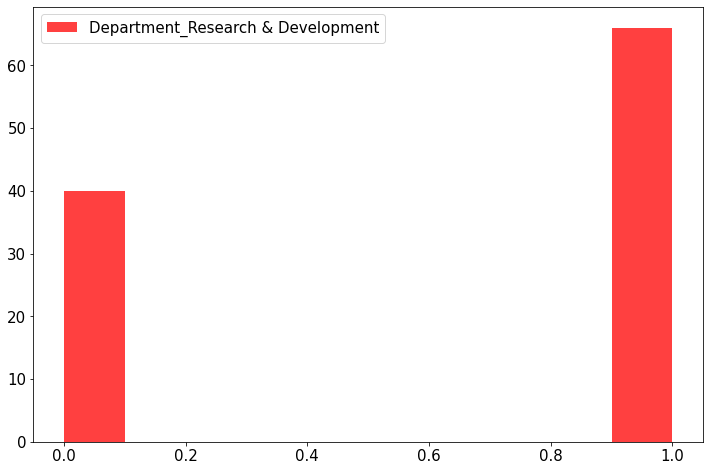

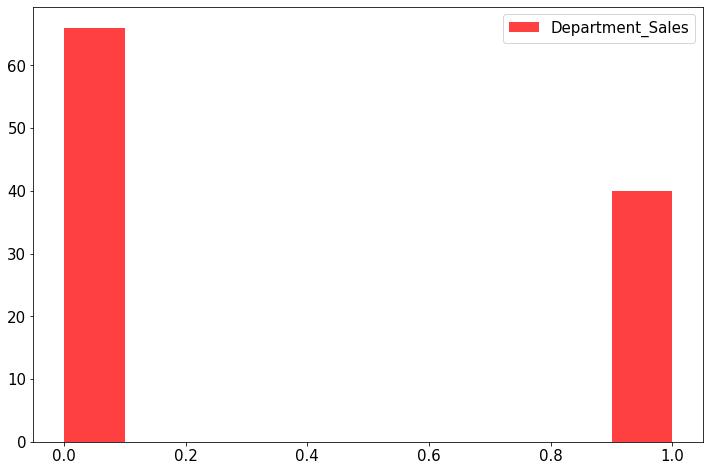

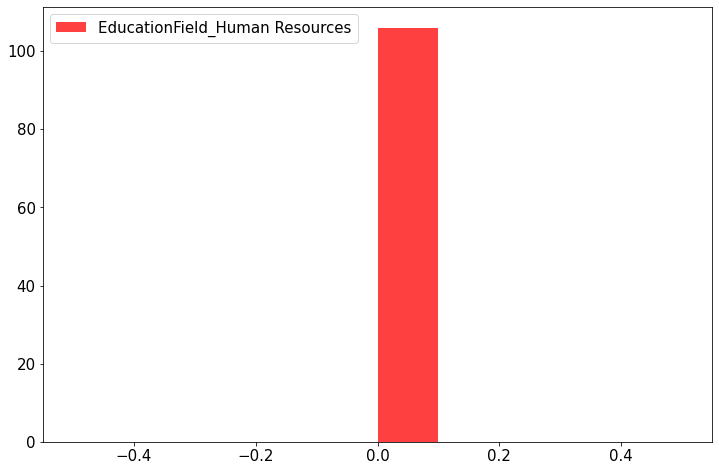

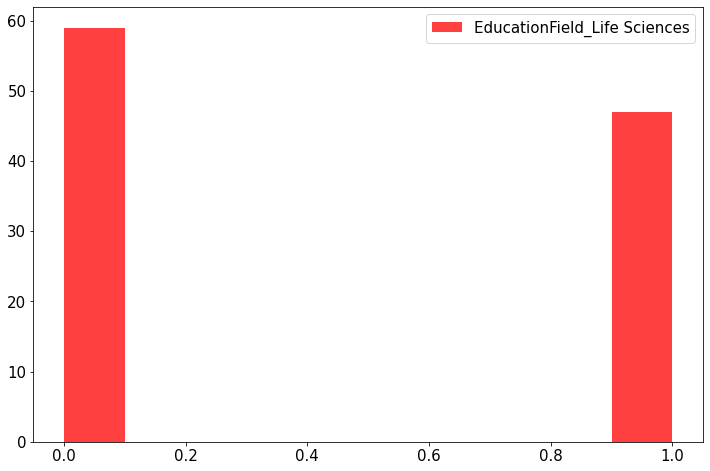

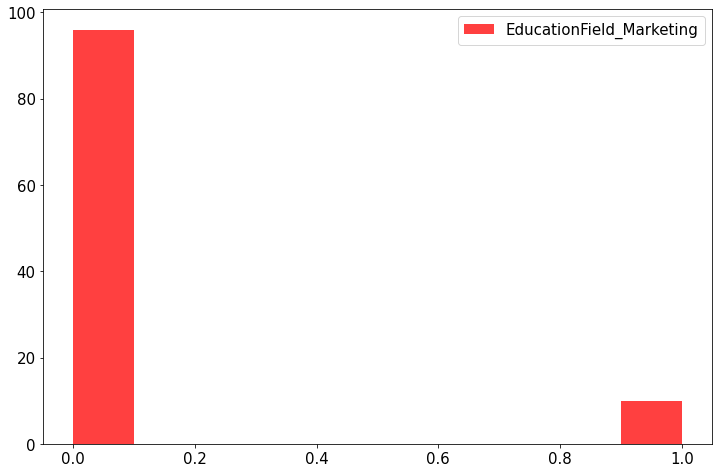

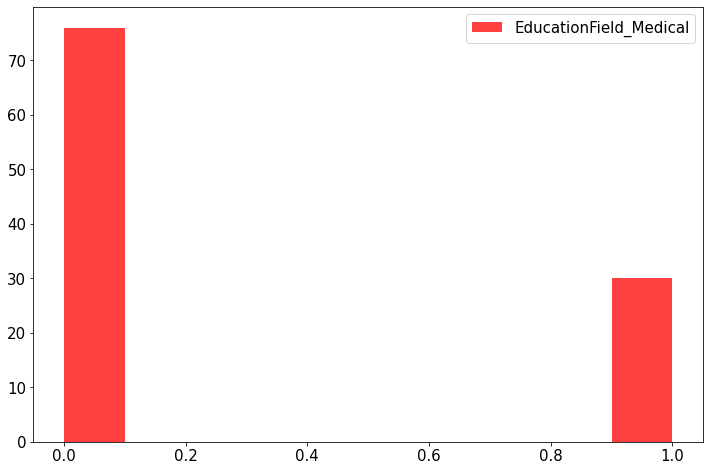

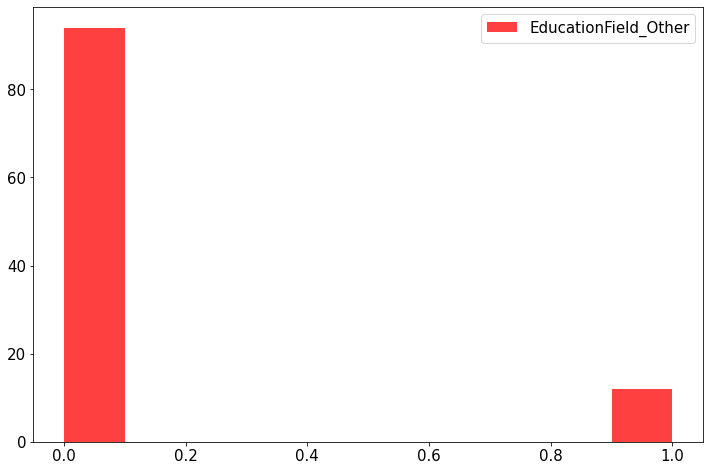

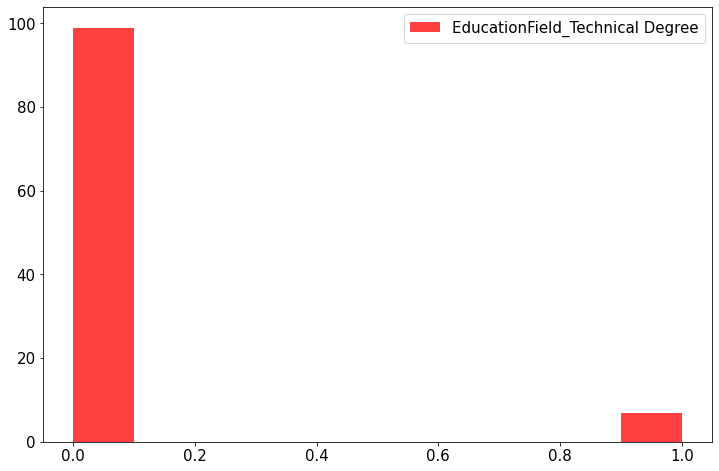

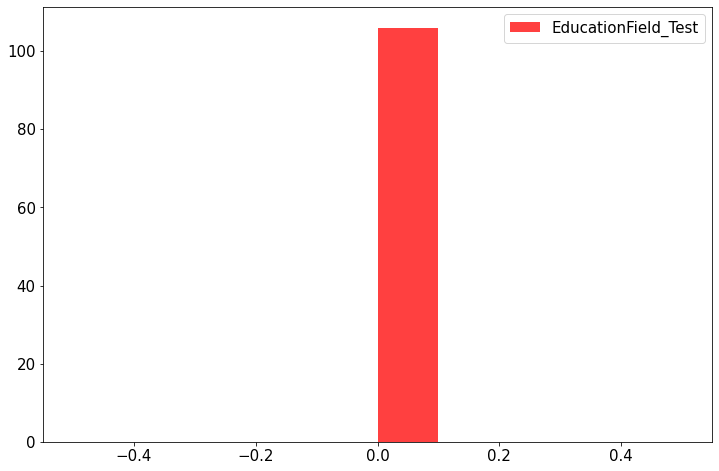

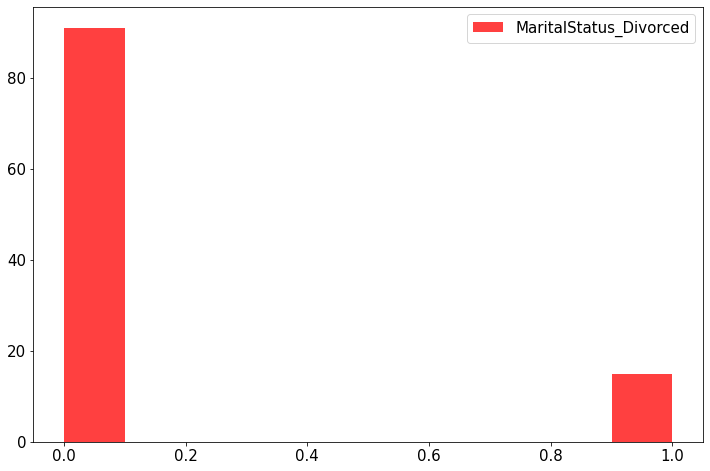

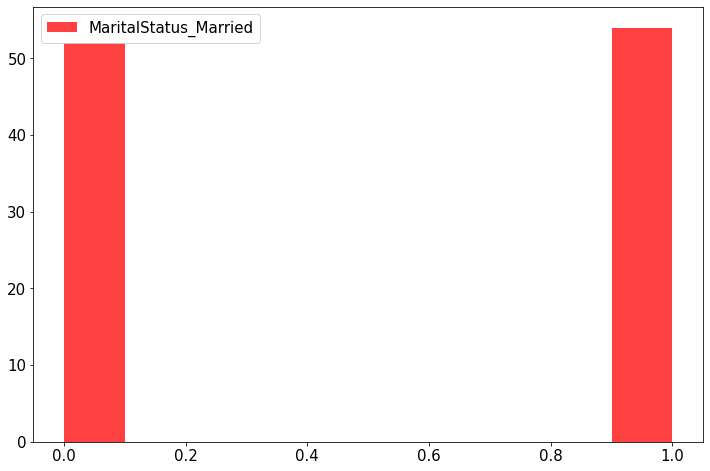

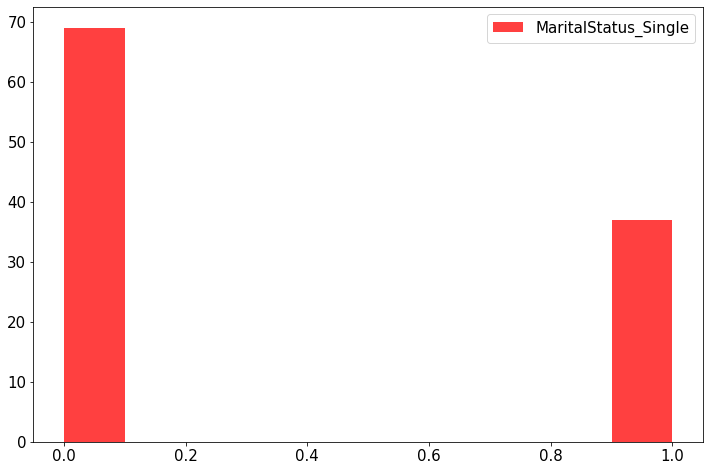

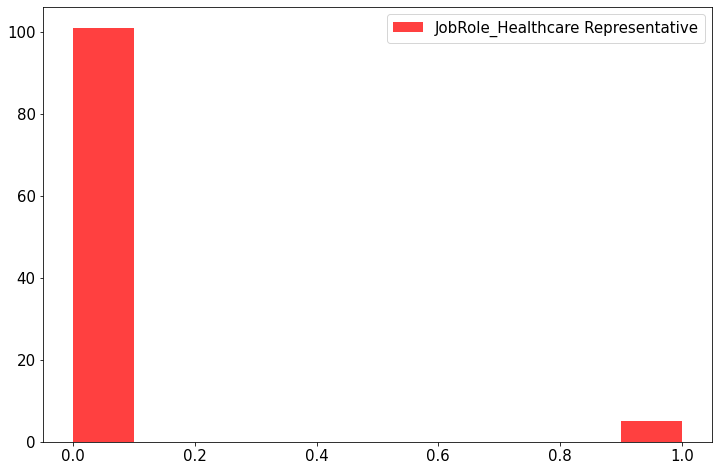

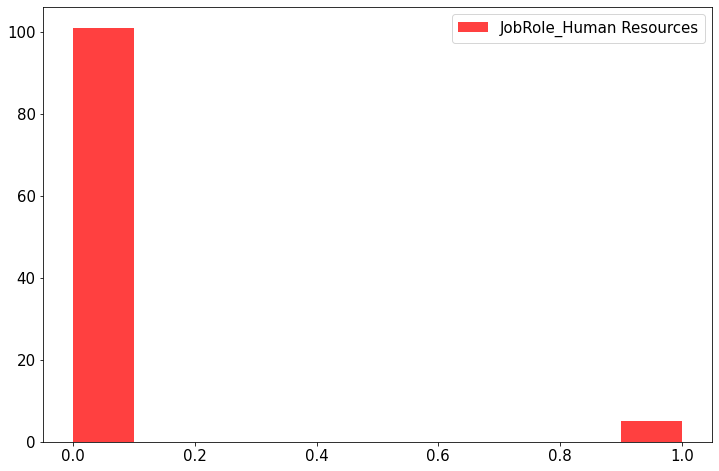

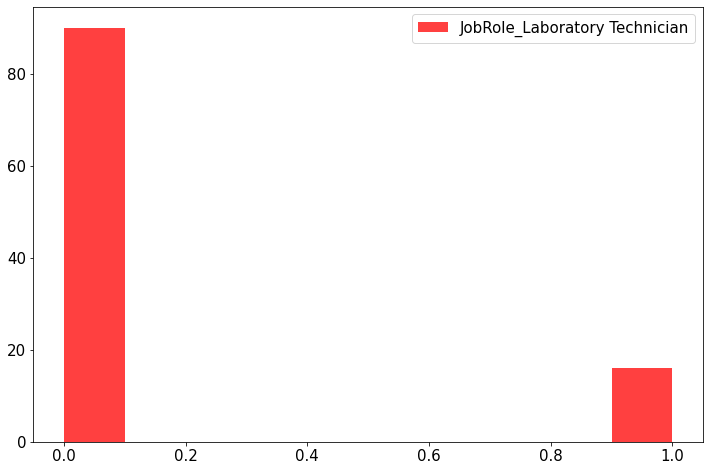

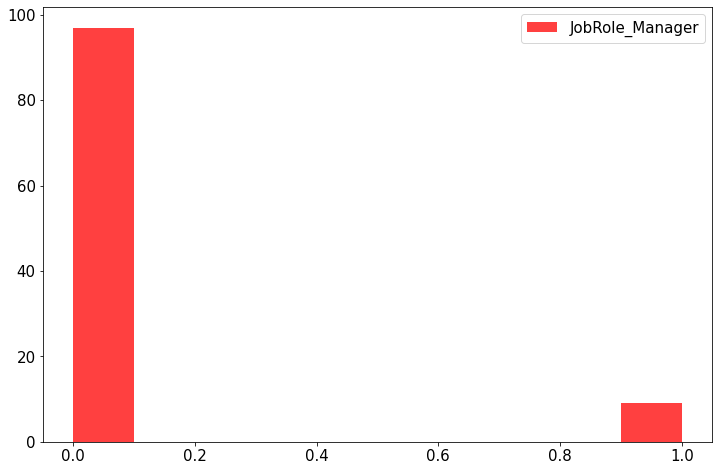

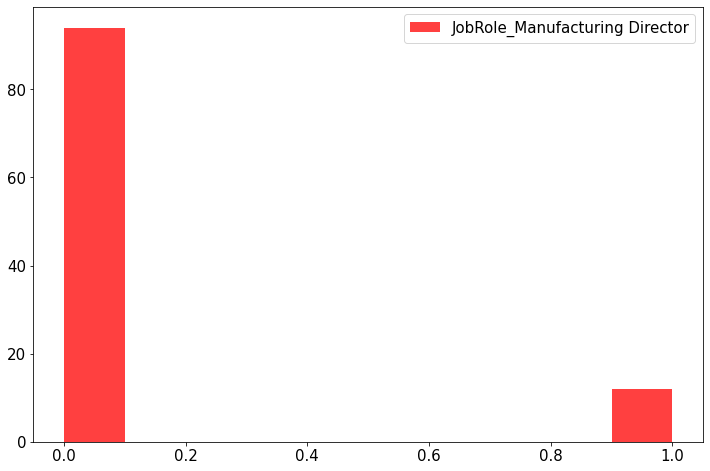

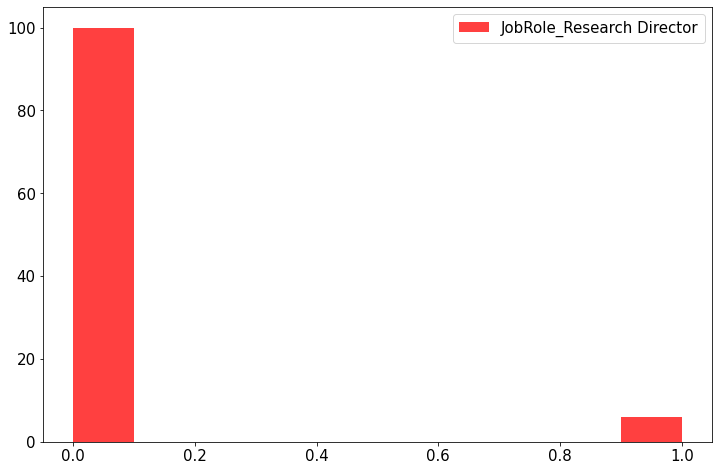

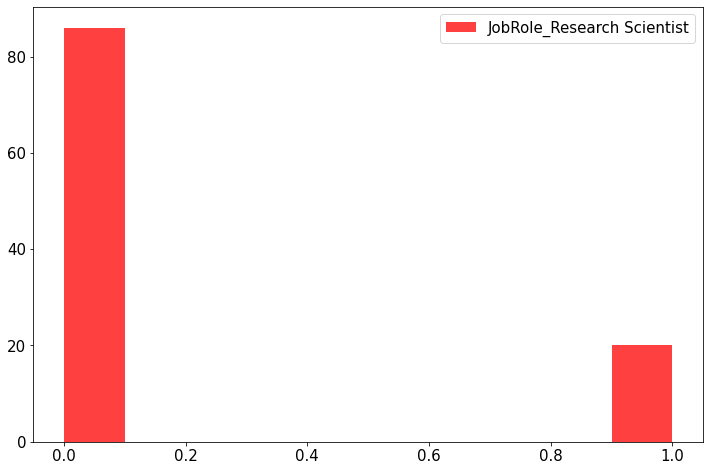

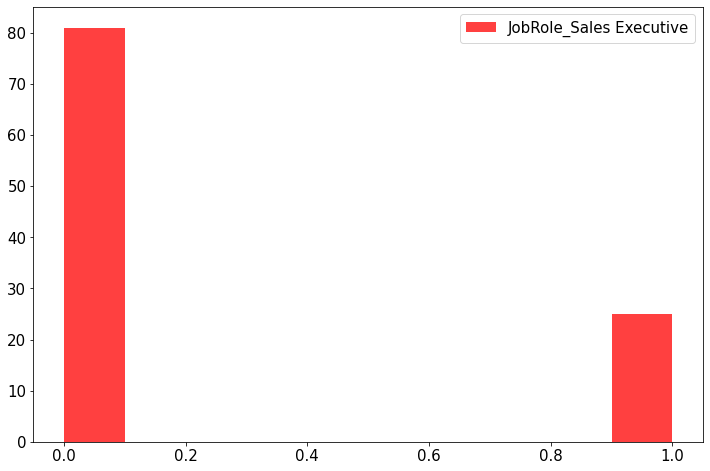

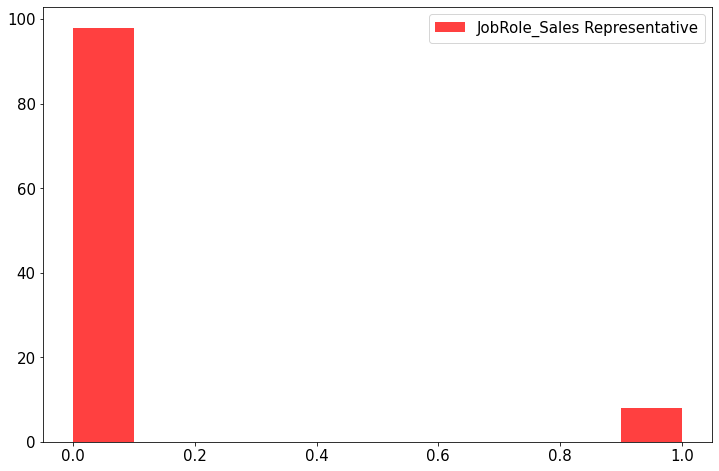

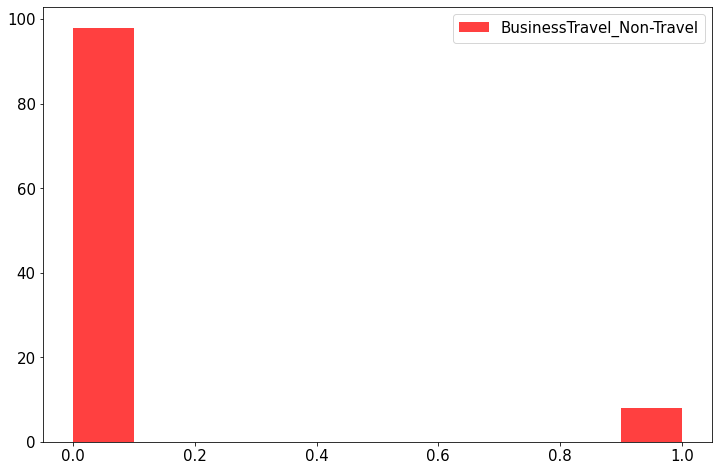

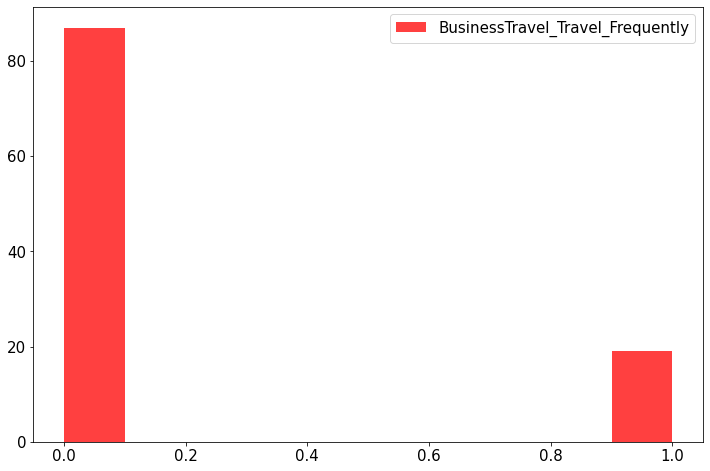

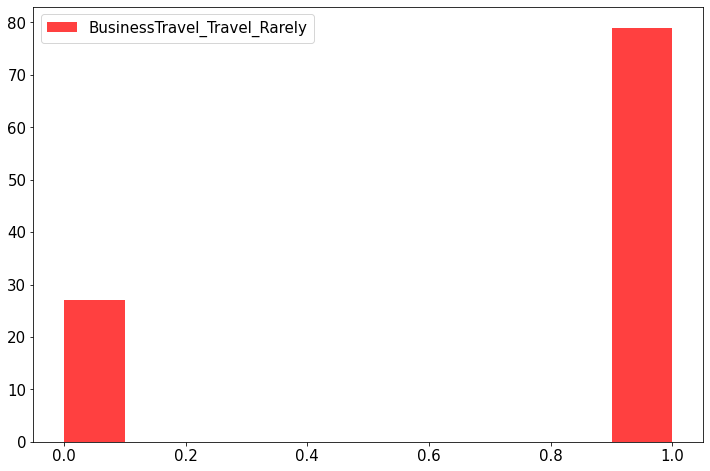

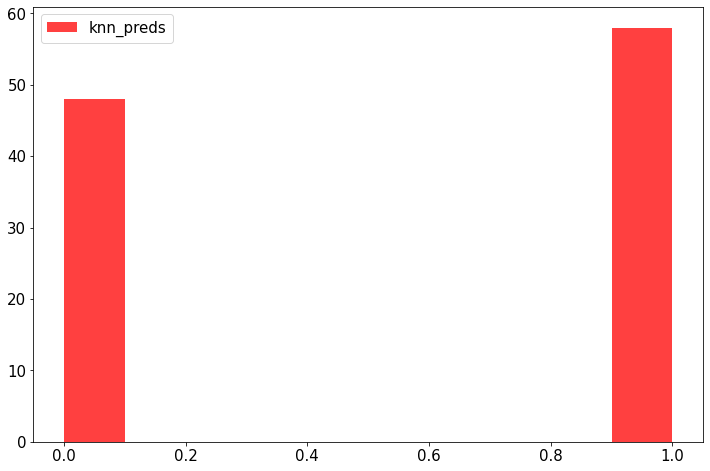

In [107]:
for col in dfwrong.columns:
  plt.figure(figsize=(12, 8))
  plt.hist(dfwrong[col], color='red', label=col, alpha=0.75)
  plt.legend()

In [108]:
catWrongCol = ['Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Human Resources',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'EducationField_Test',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'JobRole_Healthcare Representative',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'JobRole_Sales Representative',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely']
for col in catWrongCol:
  percent = (dfwrong[(dfwrong[col] == 1)].shape[0] / dfwrong.shape[0]) * 100
  if percent > 10 :
    print(f'Percent of wrong predictions that were {col}: {percent:.2f}')
    print('_____________________________')

Percent of wrong predictions that were Department_Research & Development: 62.26
_____________________________
Percent of wrong predictions that were Department_Sales: 37.74
_____________________________
Percent of wrong predictions that were EducationField_Life Sciences: 44.34
_____________________________
Percent of wrong predictions that were EducationField_Medical: 28.30
_____________________________
Percent of wrong predictions that were EducationField_Other: 11.32
_____________________________
Percent of wrong predictions that were MaritalStatus_Divorced: 14.15
_____________________________
Percent of wrong predictions that were MaritalStatus_Married: 50.94
_____________________________
Percent of wrong predictions that were MaritalStatus_Single: 34.91
_____________________________
Percent of wrong predictions that were JobRole_Laboratory Technician: 15.09
_____________________________
Percent of wrong predictions that were JobRole_Manufacturing Director: 11.32
___________________

### Is there anything other than the Department's diversity in pay/levels that is throwing off our model?

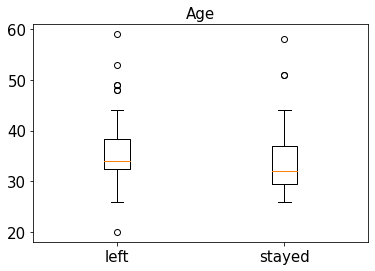

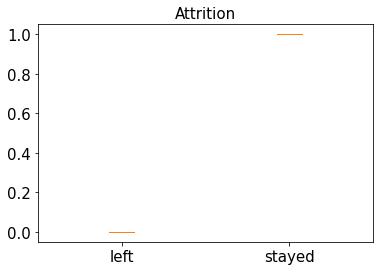

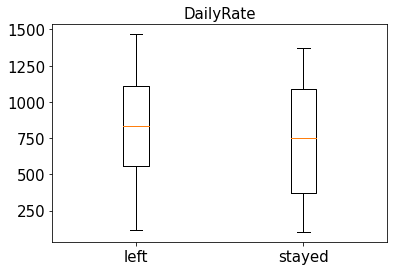

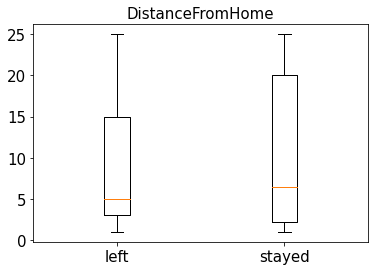

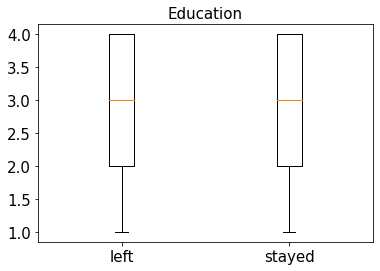

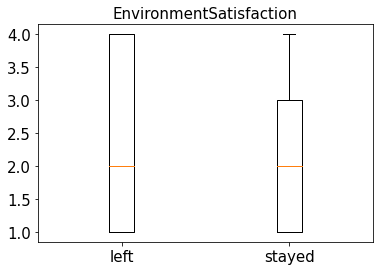

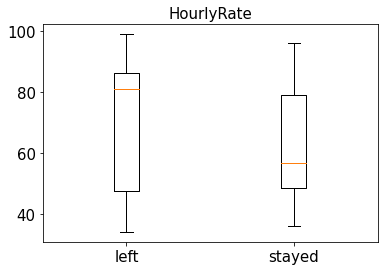

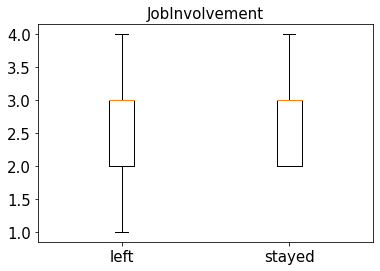

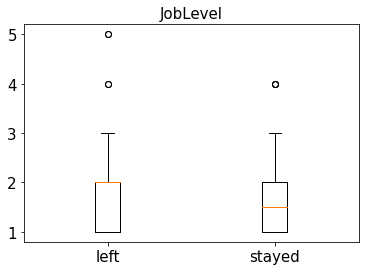

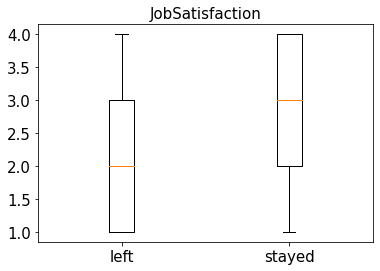

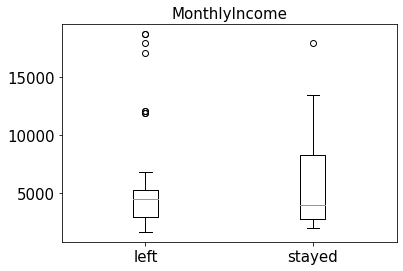

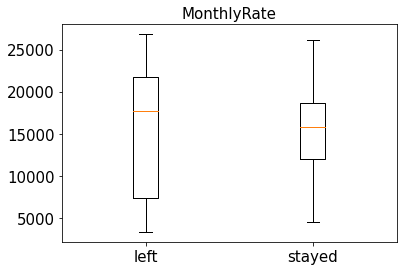

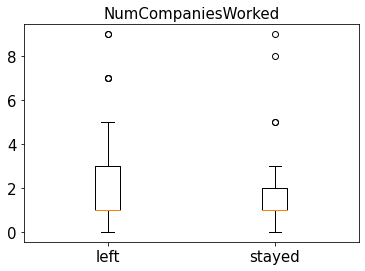

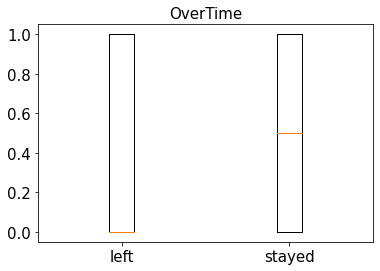

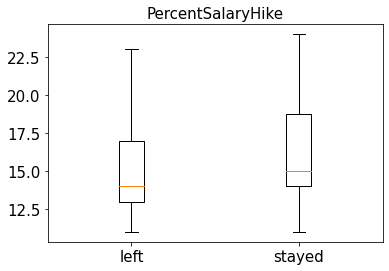

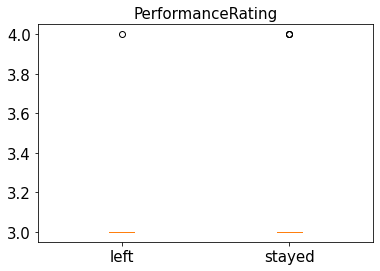

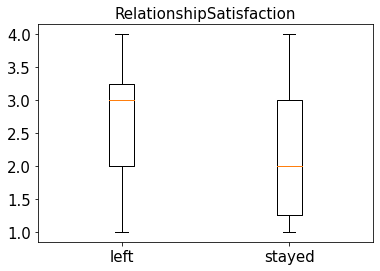

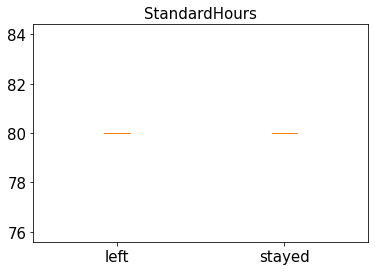

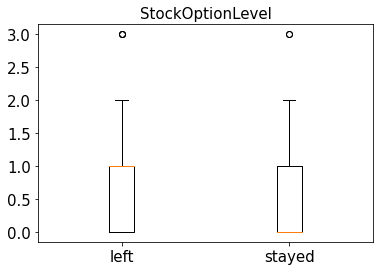

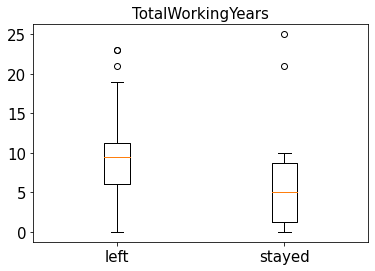

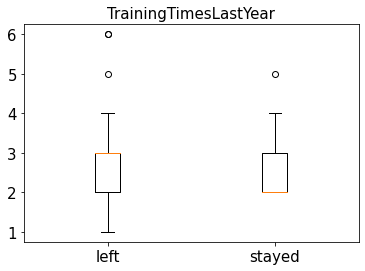

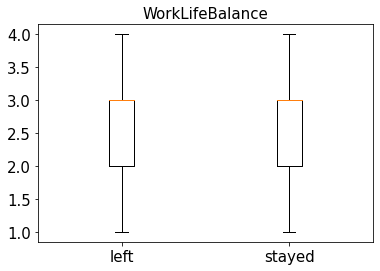

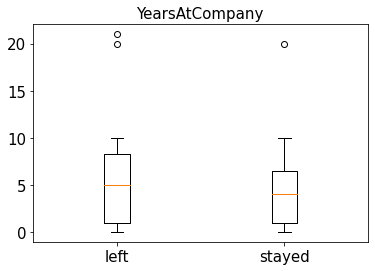

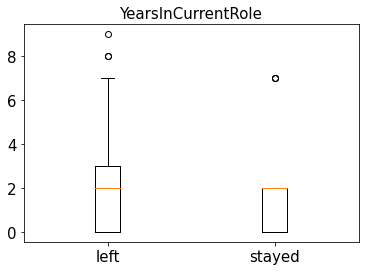

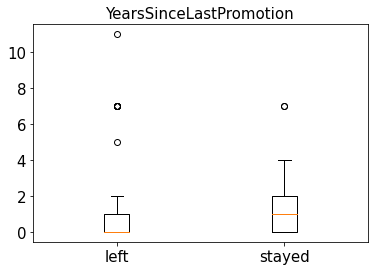

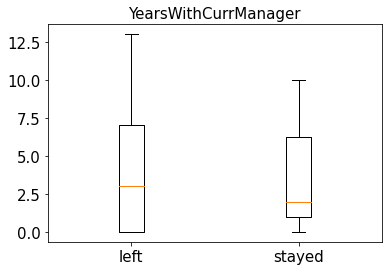

In [109]:
dfWrongRD = (dfwrong[(dfwrong['Department_Research & Development'] == 1)])

columnsall = ['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager']
dfWrongRDPredictedStayed = (dfWrongRD[(dfWrongRD['knn_preds'] == 0)])
dfWrongRDPredictedLeft = (dfWrongRD[(dfWrongRD['knn_preds'] == 1)])

for col in columnsall:
  left = dfWrongRDPredictedLeft[col]
  stayed = dfWrongRDPredictedStayed[col]
  data = [left, stayed]
  # Multiple box plots on one Axes
  fig, ax = plt.subplots()
  ax.boxplot(data)
  ax.set_title(col)
  plt.xticks([1, 2], ['left', 'stayed'])
  plt.show()

### Wrong predictions vs test_df

In [113]:
catWrongCol = ['Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Human Resources',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'EducationField_Test',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'JobRole_Healthcare Representative',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'JobRole_Sales Representative',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely']

for col in catWrongCol:
  if test_df[(test_df[col] == 1)].shape[0] > 0 :
    percent = (dfwrong[(dfwrong[col] == 1)].shape[0] / test_df[(test_df[col] == 1)].shape[0]) * 100
    if (percent > 2) & (dfwrong[(dfwrong[col] == 1)].shape[0] > 30):
      print(f'Percent of {col} that were wrong: {percent:.2f}')
      print('_____________________________')

Percent of Department_Research & Development that were wrong: 4.00
_____________________________
Percent of Department_Sales that were wrong: 5.71
_____________________________
Percent of EducationField_Life Sciences that were wrong: 4.63
_____________________________
Percent of MaritalStatus_Married that were wrong: 4.80
_____________________________
Percent of MaritalStatus_Single that were wrong: 4.64
_____________________________
Percent of BusinessTravel_Travel_Rarely that were wrong: 4.54
_____________________________


##Investigating wrong predictions: Lab technicians



In [115]:
dfWrongLabTech = (dfwrong[(dfwrong['JobRole_Laboratory Technician'] == 1)])

columnsall = ['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager']
dfWrongLabTechPredictedStayed = (dfWrongLabTech[(dfWrongLabTech['knn_preds'] == 0)])
dfWrongLabTechPredictedLeft = (dfWrongLabTech[(dfWrongLabTech['knn_preds'] == 1)])

print(dfWrongLabTechPredictedStayed.shape[0])
print(dfWrongLabTechPredictedLeft.shape[0])

10
6


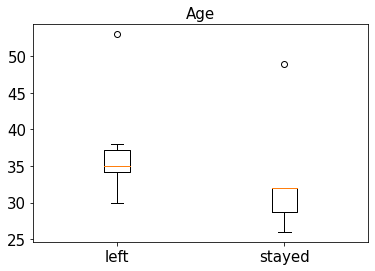

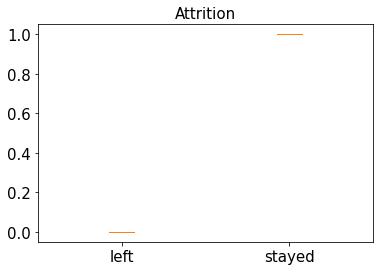

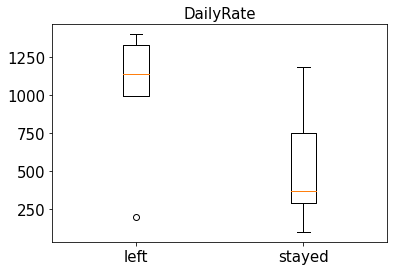

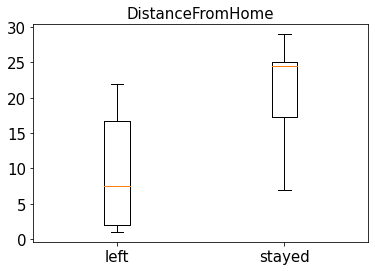

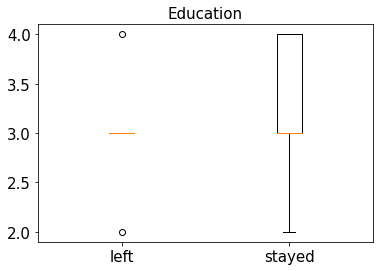

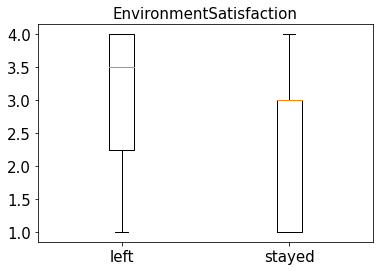

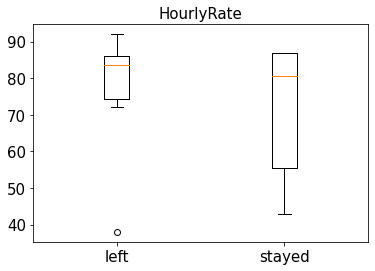

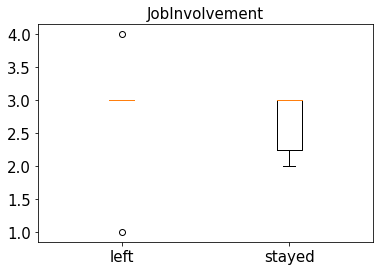

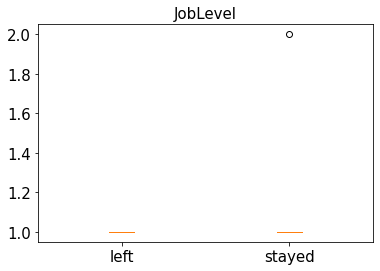

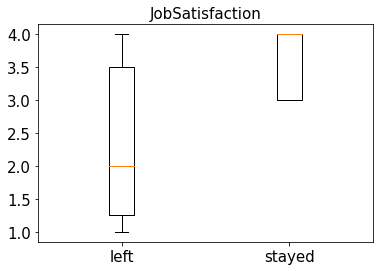

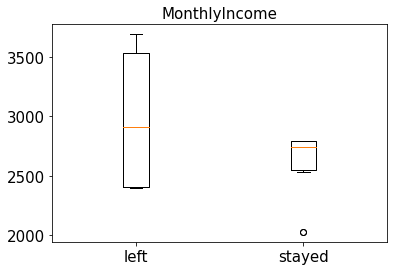

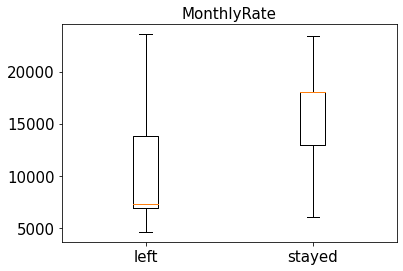

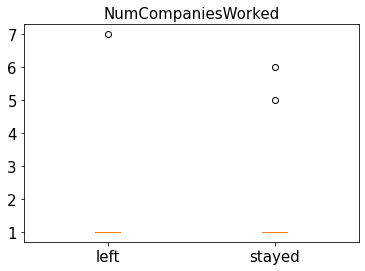

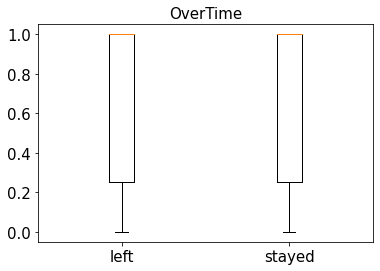

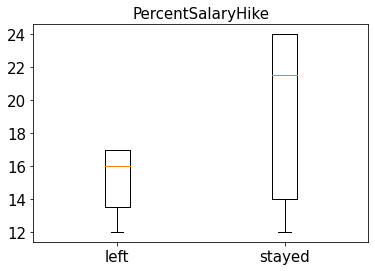

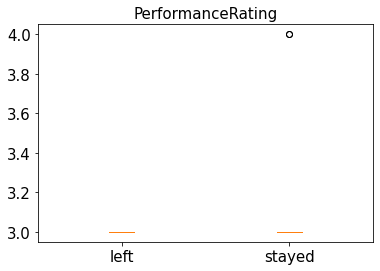

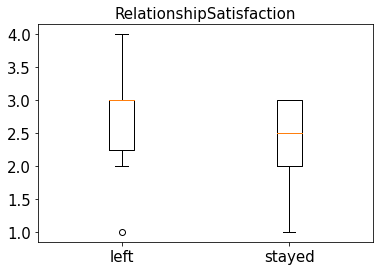

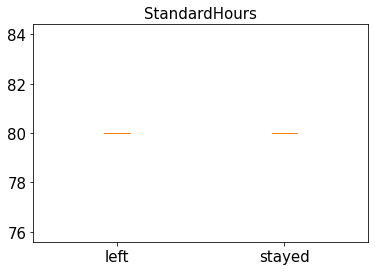

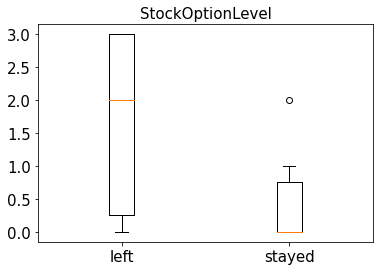

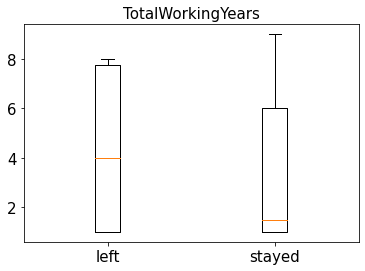

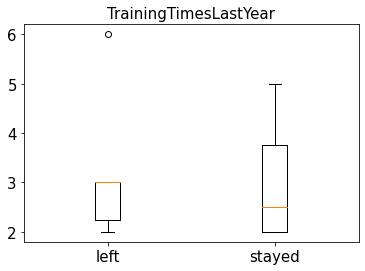

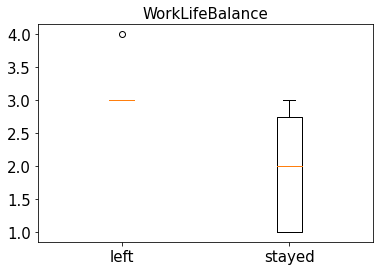

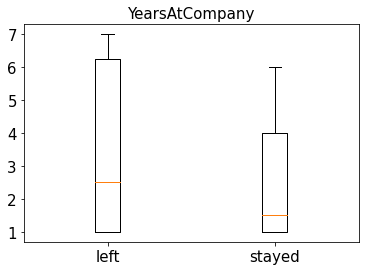

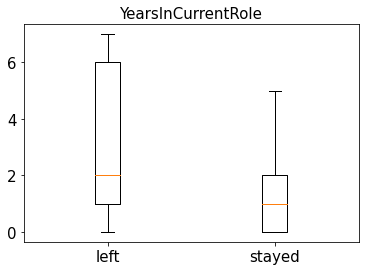

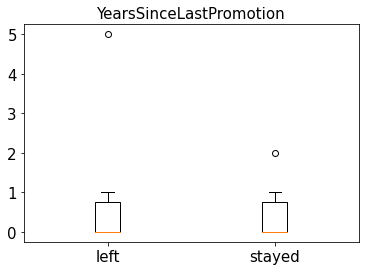

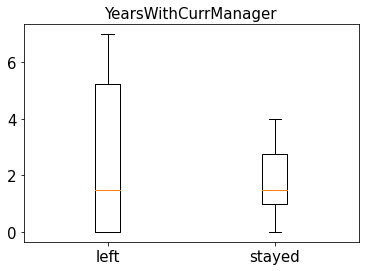

In [116]:
for col in columnsall:
  left = dfWrongLabTechPredictedLeft[col]
  stayed = dfWrongLabTechPredictedStayed[col]
  data = [left, stayed]
  # Multiple box plots on one Axes
  fig, ax = plt.subplots()
  ax.boxplot(data)
  ax.set_title(col)
  plt.xticks([1, 2], ['left', 'stayed'])
  plt.show()

# XGBoost models

XGBoost: Startified

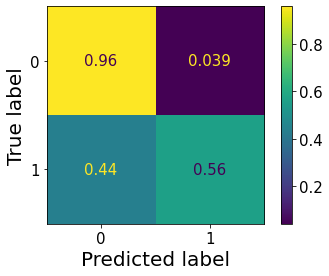

In [117]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

xgb_clf = XGBClassifier(n_estimators=100, max_depth=100, learning_rate=1e-3, n_jobs=-1)

xgb_clf.fit(X_train, y_train)

ConfusionMatrixDisplay.from_predictions(y_test, xgb_clf.predict(X_test), normalize='true')
plt.show()

In [118]:
y_pred_proba = xgb_clf.predict_proba(X_test)[:,1]

test_df['predictions'] = y_pred_proba

dfwrong_false0 = test_df[test_df['Attrition'] == 1]
dfwrong_false0 = dfwrong_false0[(dfwrong_false0['predictions'] < 0.5)]
catWrongCol = ['Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Human Resources',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'EducationField_Test',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'JobRole_Healthcare Representative',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'JobRole_Sales Representative',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely']
for col in catWrongCol:
  percent = (dfwrong_false0[(dfwrong_false0[col] == 1)].shape[0] / dfwrong_false0.shape[0]) * 100
  if percent > 10 :
    print(f'Percent of false 0 (stayed) that were {col}: {percent:.2f}')
    print('_____________________________')

Percent of false 0 (stayed) that were Department_Research & Development: 57.99
_____________________________
Percent of false 0 (stayed) that were Department_Sales: 39.64
_____________________________
Percent of false 0 (stayed) that were EducationField_Life Sciences: 41.42
_____________________________
Percent of false 0 (stayed) that were EducationField_Marketing: 11.83
_____________________________
Percent of false 0 (stayed) that were EducationField_Medical: 31.36
_____________________________
Percent of false 0 (stayed) that were MaritalStatus_Divorced: 23.67
_____________________________
Percent of false 0 (stayed) that were MaritalStatus_Married: 43.79
_____________________________
Percent of false 0 (stayed) that were MaritalStatus_Single: 32.54
_____________________________
Percent of false 0 (stayed) that were JobRole_Laboratory Technician: 21.30
_____________________________
Percent of false 0 (stayed) that were JobRole_Research Scientist: 17.16
_____________________________

In [119]:
test_df[test_df['Attrition'] == 1].shape[0] / test_df[test_df['Attrition'] == 0].shape[0]

0.195906432748538

In [120]:
X_train.shape[0]

5725

In [121]:
X_test.shape[0]

2454

## XGBoost: Balanced data

In [122]:
#take df and balance by attrition
def balanceDf(dfToBalance):
  rows = dfToBalance[(dfToBalance['Attrition'] == 1)].shape[0]
  dfResigned = dfToBalance[(dfToBalance['Attrition'] == 1)]
  dfCurrent = dfToBalance[(dfToBalance['Attrition'] == 0 )]
  dfCurrent = dfCurrent.sample(n = rows)

  assert dfResigned.shape[0] == dfCurrent.shape[0]

  dfBalanced = pd.concat([dfResigned, dfCurrent], axis=0)
  return dfBalanced

In [123]:
df_balanced = balanceDf(df)

In [128]:
balanced_train_df, balanced_test_df = train_test_split(df_balanced, train_size=0.7)

balanced_X_train = balanced_train_df.drop('Attrition', axis=1)
balanced_y_train = balanced_train_df['Attrition']

balanced_X_test = balanced_test_df.drop('Attrition', axis=1)
balanced_y_test = balanced_test_df['Attrition']

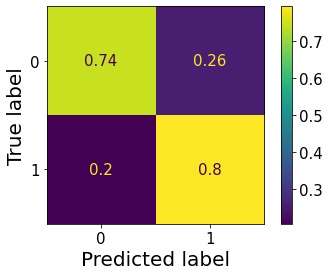

In [129]:
xgb_clf_balanced = XGBClassifier(n_estimators=100, max_depth=100, learning_rate=1e-3, n_jobs=-1)

xgb_clf_balanced.fit(balanced_X_train, balanced_y_train)

ConfusionMatrixDisplay.from_predictions(balanced_y_test, xgb_clf_balanced.predict(balanced_X_test), normalize='true')
plt.show()

In [130]:
balanced_train_df.shape[0]

1875

In [131]:
y_pred_proba = xgb_clf_balanced.predict_proba(balanced_X_test)[:,1]

balanced_test_df['predictions'] = y_pred_proba

dfwrong2 = balanced_test_df[balanced_test_df['Attrition'] != balanced_test_df['predictions']]
catWrongCol = ['Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Human Resources',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'EducationField_Test',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'JobRole_Healthcare Representative',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'JobRole_Sales Representative',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely']
for col in catWrongCol:
  percent = (dfwrong2[(dfwrong2[col] == 1)].shape[0] / dfwrong2.shape[0]) * 100
  if percent > 10 :
    print(f'Percent of wrong predictions that were {col}: {percent:.2f}')
    print('_____________________________')

Percent of wrong predictions that were Department_Research & Development: 61.12
_____________________________
Percent of wrong predictions that were Department_Sales: 34.29
_____________________________
Percent of wrong predictions that were EducationField_Life Sciences: 37.76
_____________________________
Percent of wrong predictions that were EducationField_Marketing: 10.68
_____________________________
Percent of wrong predictions that were EducationField_Medical: 31.93
_____________________________
Percent of wrong predictions that were EducationField_Technical Degree: 12.42
_____________________________
Percent of wrong predictions that were MaritalStatus_Divorced: 18.51
_____________________________
Percent of wrong predictions that were MaritalStatus_Married: 42.11
_____________________________
Percent of wrong predictions that were MaritalStatus_Single: 39.38
_____________________________
Percent of wrong predictions that were JobRole_Laboratory Technician: 19.38
______________